<a href="https://colab.research.google.com/github/invegat/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_142_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [4]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [5]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=29.11486073105522, pvalue=4.7619882729515183e-07)


In [6]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Live Lecture - let's explore some more of scipy.stats

In [0]:
# Taking requests! Come to lecture with a topic or problem and we'll try it.

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.

In [8]:
# http://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29#
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip


--2018-12-15 20:19:03--  http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/zip]
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip    100%[===================>]  41.00M  5.85MB/s    in 11s     

2018-12-15 20:19:19 (3.65 MB/s) - ‘drugsCom_raw.zip’ saved [42989872/42989872]



In [9]:
!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [10]:
import pandas as pd
sample_size = 10000
df = pd.read_csv('drugsComTrain_raw.tsv', sep='\t')
#df = df[df.drugName.notnull() and df.condition.notnull() and df.rating.notnull()]
df = df.dropna()
df = df[~df.condition.str.contains('<')]
# df.rating.apply(lambda rating: rating if rating < 10 else 10)
#df = df.sample(n=sample_size).drop(['Unnamed: 0','review','date','usefulCount'], axis=1).reindex(range(1,sample_size), axis=0)
# df = df.sample(n=sample_size).drop(['Unnamed: 0','review','date','usefulCount'], axis=1)
df = df.drop(['Unnamed: 0','review','date','usefulCount'], axis=1)
df.tail()
# df.shape

,drugName,condition,rating
161292,Campral,Alcohol Dependence,10.0
161293,Metoclopramide,Nausea/Vomiting,1.0
161294,Orencia,Rheumatoid Arthritis,2.0
161295,Thyroid desiccated,Underactive Thyroid,10.0
161296,Lubiprostone,"Constipation, Chronic",9.0


In [0]:
# Confidence intervals!
# Similar to hypothesis testing, but centered at sample mean
# Better than reporting the "point estimate" (sample mean)
# Why? Because point estimates aren't always perfect

import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (mean, mean - interval, mean + interval)

def report_confidence_interval(confidence_interval):
  """
  Return a string with a pretty report of a confidence interval.
  
  Arguments:
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    None, but prints to screen the report
  """
  #print('Mean: {}'.format(confidence_interval[0]))
  #print('Lower bound: {}'.format(confidence_interval[1]))
  #print('Upper bound: {}'.format(confidence_interval[2]))
  s = "our mean lies in the interval ]{:.2}, {:.2}[".format(
      confidence_interval[1], confidence_interval[2])
  s = f"our mean {confidence_interval[0]:.2f} lies in the interval {confidence_interval[1]:.2f} - {confidence_interval[2]:.2f}"
  return s

In [0]:
def color_variant(hex_color, brightness_offset=1):
    """ takes a color like #87c95f and produces a lighter or darker variant """
    if len(hex_color) != 7:
        raise Exception("Passed %s into color_variant(), needs to be in #87c95f format." % hex_color)
    rgb_hex = [hex_color[x:x+2] for x in [1, 3, 5]]
    new_rgb_int = [int(hex_value, 16) + brightness_offset for hex_value in rgb_hex]
    new_rgb_int = [min([255, max([0, i])]) for i in new_rgb_int] # make sure new values are between 0 and 255
    # hex() produces "0x88", we want just "88"
    return "#" + "".join([hex(i)[2:] for i in new_rgb_int])    

In [13]:
 color_variant('#008000',5)

'#5855'

In [0]:
minLen = 30
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

half_mean_height = 0.1

def printChart(c,data):

  df = pd.DataFrame.from_dict(data)
  # print(df.head())
  n = len(data)
  plt.figure(figsize=(max(n/5,5),5))
  data_order = [
        'min_stars','below_ci', 'ci_half_l', 'mean', 'ci_half_h', 'max_stars'
   ]
  colors = [None, "b",'g', 'black', "g", "gold"]
#   values = np.array([[d[name] for name in data_order] for d in data])
  order = np.array(data_order)
  ind = np.arange(n)    # the x locations for the groups
  bottom = np.array(df['min_stars'])
  width = 0.4
  name_dict = {'below_ci': 'Low Stars','ci_half_l': 'Confidence Interval','mean': 'Confidence Interval Mean',  'ci_half_h': None, 'max_stars': 'High Stars'}
  for name,color in zip(data_order[1:],colors[1:]):
    value = np.array(df[name])
    # p1 = plt.bar(ind, value, width, color=color, bottom = bottom, label=name_dict[name], alpha=(1 if name == 'mean_low' else 0.5))
    p1 = plt.bar(ind, value, width, color=color, bottom = bottom, label=name_dict[name]) 
    bottom += value
    # print(f'name: {name} color: {color} value: {value}')
  #plt.bar(ind,np.array(df.mean_high),width, color='black', bottom=np.array(df.mean_low), label = 'Mean')

#   plt.yticks(bottoms+0.4, ["data %d" % (t+1) for t in bottoms])
  plt.legend(loc="best", bbox_to_anchor=(1.0, 1.00))
  plt.ylabel('Stars')
  plt.title(f"Drugs for {c}")
  plt.xticks(ind, np.array(df['drug']), rotation=('vertical' if n > 3 else 'horizontal'))
#   start, end = plt.yaxis
#   plt.yaxis.set_major_locator(ticker.MultipleLocator((end - start) / 10))
  axes = plt.gca()
  axes.set_ylim([0,10.5])
  plt.yticks(np.arange(0, 11, 1))
#   plt.subplots_adjust(right=0.85)

  plt.show();
  
  

In [18]:
df.shape

(159498, 3)

for condition ADHD drug Dextroamphetamine 95% confidence interval our mean 8.69 lies in the interval 8.17 - 9.22
for condition ADHD drug Dexedrine 95% confidence interval our mean 8.63 lies in the interval 8.05 - 9.21
for condition ADHD drug Adderall 95% confidence interval our mean 8.33 lies in the interval 7.97 - 8.70
for condition ADHD drug Daytrana 95% confidence interval our mean 8.24 lies in the interval 7.47 - 9.02
for condition ADHD drug Adderall XR 95% confidence interval our mean 8.14 lies in the interval 7.72 - 8.56
for condition ADHD drug Amphetamine / dextroamphetamine 95% confidence interval our mean 8.00 lies in the interval 7.74 - 8.26
for condition ADHD drug Bupropion 95% confidence interval our mean 7.79 lies in the interval 7.09 - 8.49
for condition ADHD drug Focalin XR 95% confidence interval our mean 7.78 lies in the interval 7.07 - 8.49
for condition ADHD drug Vyvanse 95% confidence interval our mean 7.70 lies in the interval 7.44 - 7.96
for condition ADHD drug Li

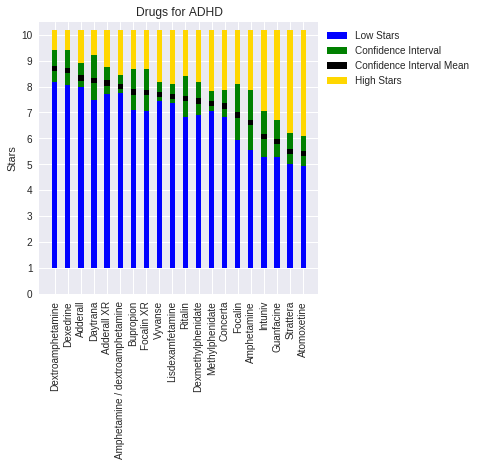

for condition Birth Control drug Ortho Evra 95% confidence interval our mean 7.47 lies in the interval 7.08 - 7.86
for condition Birth Control drug Kyleena 95% confidence interval our mean 7.46 lies in the interval 7.04 - 7.89
for condition Birth Control drug Skyla 95% confidence interval our mean 7.26 lies in the interval 7.06 - 7.45
for condition Birth Control drug Copper 95% confidence interval our mean 7.23 lies in the interval 6.98 - 7.49
for condition Birth Control drug Levonorgestrel 95% confidence interval our mean 7.06 lies in the interval 6.93 - 7.19
for condition Birth Control drug Beyaz 95% confidence interval our mean 7.00 lies in the interval 6.24 - 7.76
for condition Birth Control drug Mirena 95% confidence interval our mean 6.96 lies in the interval 6.75 - 7.16
for condition Birth Control drug Generess Fe 95% confidence interval our mean 6.88 lies in the interval 6.30 - 7.47
for condition Birth Control drug NuvaRing 95% confidence interval our mean 6.74 lies in the inte

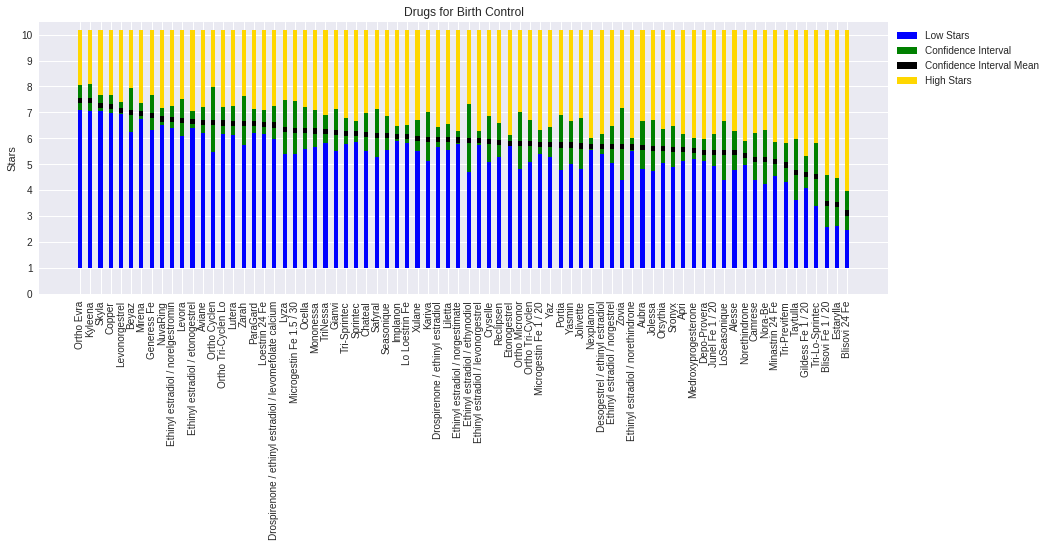

for condition Opiate Dependence drug Subutex 95% confidence interval our mean 9.22 lies in the interval 8.96 - 9.49
for condition Opiate Dependence drug Buprenorphine 95% confidence interval our mean 9.19 lies in the interval 8.86 - 9.51
for condition Opiate Dependence drug Suboxone 95% confidence interval our mean 9.05 lies in the interval 8.85 - 9.25
for condition Opiate Dependence drug Buprenorphine / naloxone 95% confidence interval our mean 8.61 lies in the interval 8.38 - 8.85
for condition Opiate Dependence drug Naltrexone 95% confidence interval our mean 8.12 lies in the interval 7.43 - 8.82
for condition Opiate Dependence drug Vivitrol 95% confidence interval our mean 7.95 lies in the interval 7.05 - 8.85
for condition Opiate Dependence drug Zubsolv 95% confidence interval our mean 6.97 lies in the interval 5.77 - 8.17
for condition Opiate Dependence drug Bunavail 95% confidence interval our mean 6.09 lies in the interval 4.73 - 7.44


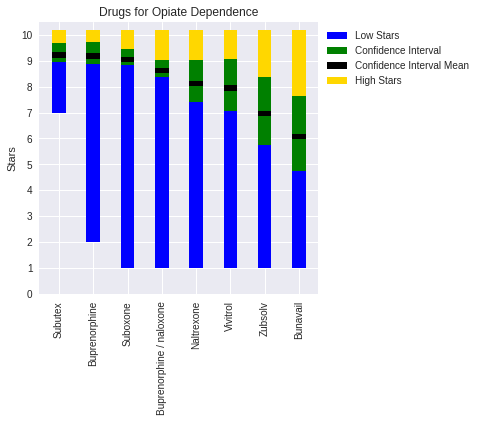

for condition Benign Prostatic Hyperplasia drug Cialis 95% confidence interval our mean 7.90 lies in the interval 6.98 - 8.82
for condition Benign Prostatic Hyperplasia drug Tadalafil 95% confidence interval our mean 7.87 lies in the interval 6.94 - 8.81
for condition Benign Prostatic Hyperplasia drug Rapaflo 95% confidence interval our mean 6.42 lies in the interval 5.75 - 7.09
for condition Benign Prostatic Hyperplasia drug Silodosin 95% confidence interval our mean 5.86 lies in the interval 5.11 - 6.61
for condition Benign Prostatic Hyperplasia drug Tamsulosin 95% confidence interval our mean 5.64 lies in the interval 5.09 - 6.19
for condition Benign Prostatic Hyperplasia drug Alfuzosin 95% confidence interval our mean 5.57 lies in the interval 4.54 - 6.60
for condition Benign Prostatic Hyperplasia drug Flomax 95% confidence interval our mean 5.19 lies in the interval 4.44 - 5.94


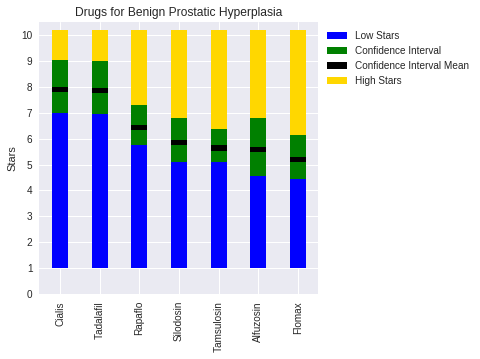

for condition Emergency Contraception drug Plan B One-Step 95% confidence interval our mean 8.71 lies in the interval 8.47 - 8.95
for condition Emergency Contraception drug Plan B 95% confidence interval our mean 8.66 lies in the interval 8.45 - 8.88
for condition Emergency Contraception drug Levonorgestrel 95% confidence interval our mean 8.47 lies in the interval 8.32 - 8.63
for condition Emergency Contraception drug Next Choice 95% confidence interval our mean 7.70 lies in the interval 6.49 - 8.91
for condition Emergency Contraception drug Ulipristal 95% confidence interval our mean 6.98 lies in the interval 6.07 - 7.89
for condition Emergency Contraception drug ella 95% confidence interval our mean 6.98 lies in the interval 6.04 - 7.92
for condition Emergency Contraception drug Aftera 95% confidence interval our mean 6.66 lies in the interval 5.59 - 7.73


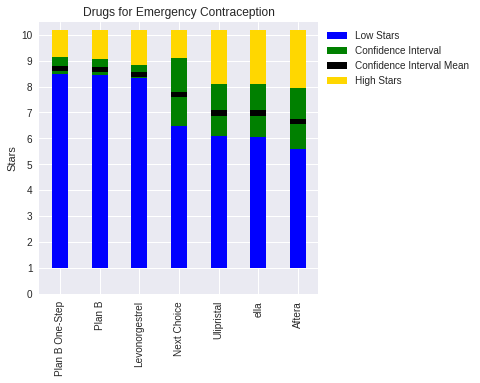

for condition Bipolar Disorde drug Klonopin 95% confidence interval our mean 8.68 lies in the interval 7.99 - 9.38
for condition Bipolar Disorde drug Gabapentin 95% confidence interval our mean 8.52 lies in the interval 7.96 - 9.08
for condition Bipolar Disorde drug Clonazepam 95% confidence interval our mean 8.36 lies in the interval 7.58 - 9.14
for condition Bipolar Disorde drug Lamictal 95% confidence interval our mean 8.28 lies in the interval 7.99 - 8.57
for condition Bipolar Disorde drug Lamotrigine 95% confidence interval our mean 8.28 lies in the interval 8.03 - 8.53
for condition Bipolar Disorde drug Oxcarbazepine 95% confidence interval our mean 8.09 lies in the interval 7.50 - 8.68
for condition Bipolar Disorde drug Topiramate 95% confidence interval our mean 7.82 lies in the interval 7.09 - 8.55
for condition Bipolar Disorde drug Seroquel XR 95% confidence interval our mean 7.73 lies in the interval 7.00 - 8.45
for condition Bipolar Disorde drug Lithium 95% confidence inter

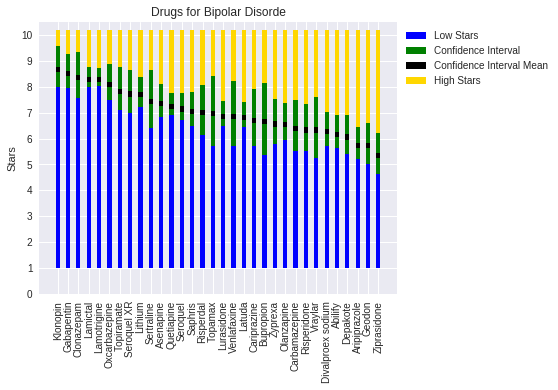

for condition Epilepsy drug Divalproex sodium 95% confidence interval our mean 7.33 lies in the interval 6.52 - 8.15
for condition Epilepsy drug Carbamazepine 95% confidence interval our mean 7.03 lies in the interval 5.94 - 8.11
for condition Epilepsy drug Levetiracetam 95% confidence interval our mean 6.12 lies in the interval 5.16 - 7.07


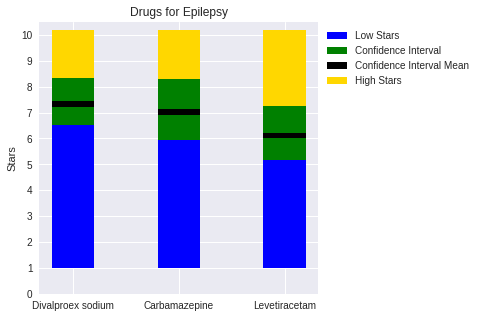

for condition Migraine Prevention drug Verapamil 95% confidence interval our mean 8.23 lies in the interval 7.16 - 9.31
for condition Migraine Prevention drug Nortriptyline 95% confidence interval our mean 8.16 lies in the interval 7.68 - 8.65
for condition Migraine Prevention drug Amitriptyline 95% confidence interval our mean 7.85 lies in the interval 7.43 - 8.26
for condition Migraine Prevention drug Propranolol 95% confidence interval our mean 7.65 lies in the interval 7.10 - 8.20
for condition Migraine Prevention drug OnabotulinumtoxinA 95% confidence interval our mean 7.14 lies in the interval 6.20 - 8.08
for condition Migraine Prevention drug Botox 95% confidence interval our mean 6.81 lies in the interval 5.81 - 7.81
for condition Migraine Prevention drug Topamax 95% confidence interval our mean 6.35 lies in the interval 5.91 - 6.78
for condition Migraine Prevention drug Divalproex sodium 95% confidence interval our mean 6.20 lies in the interval 5.14 - 7.26
for condition Migra

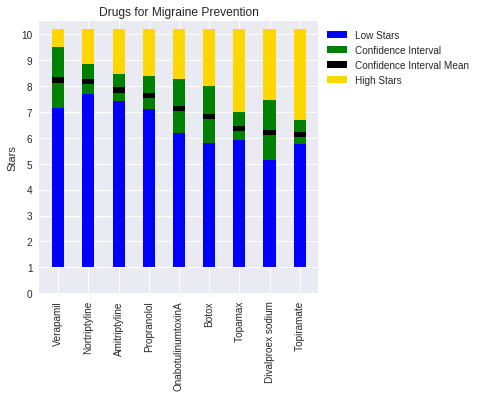

for condition Depression drug Tramadol 95% confidence interval our mean 9.29 lies in the interval 8.93 - 9.64
for condition Depression drug Xanax 95% confidence interval our mean 9.17 lies in the interval 8.60 - 9.73
for condition Depression drug Alprazolam 95% confidence interval our mean 9.08 lies in the interval 8.59 - 9.57
for condition Depression drug St. john's wort 95% confidence interval our mean 8.77 lies in the interval 8.19 - 9.34
for condition Depression drug Parnate 95% confidence interval our mean 8.76 lies in the interval 7.96 - 9.56
for condition Depression drug Amitriptyline 95% confidence interval our mean 8.55 lies in the interval 7.81 - 9.30
for condition Depression drug Tranylcypromine 95% confidence interval our mean 8.53 lies in the interval 7.65 - 9.41
for condition Depression drug Lamotrigine 95% confidence interval our mean 8.11 lies in the interval 7.32 - 8.89
for condition Depression drug L-methylfolate 95% confidence interval our mean 8.06 lies in the inter

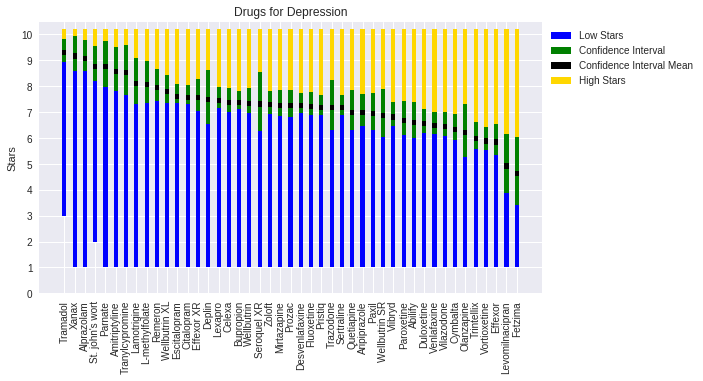

for condition Cough drug Chlorpheniramine / hydrocodone 95% confidence interval our mean 9.42 lies in the interval 9.06 - 9.78
for condition Cough drug Tussionex Pennkinetic 95% confidence interval our mean 9.27 lies in the interval 8.80 - 9.75
for condition Cough drug Homatropine / hydrocodone 95% confidence interval our mean 7.72 lies in the interval 6.99 - 8.46
for condition Cough drug Codeine / promethazine 95% confidence interval our mean 7.67 lies in the interval 6.53 - 8.80
for condition Cough drug Guaifenesin 95% confidence interval our mean 6.61 lies in the interval 5.50 - 7.72
for condition Cough drug Tessalon Perles 95% confidence interval our mean 6.51 lies in the interval 5.41 - 7.61
for condition Cough drug Codeine / guaifenesin 95% confidence interval our mean 6.05 lies in the interval 5.03 - 7.07
for condition Cough drug Benzonatate 95% confidence interval our mean 5.06 lies in the interval 4.52 - 5.60
for condition Cough drug Dextromethorphan 95% confidence interval ou

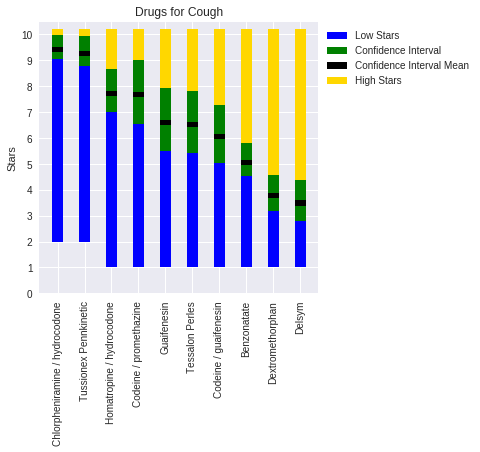

for condition Obesity drug Diethylpropion 95% confidence interval our mean 9.31 lies in the interval 8.97 - 9.65
for condition Obesity drug Tenuate 95% confidence interval our mean 9.23 lies in the interval 8.71 - 9.75
for condition Obesity drug Adipex-P 95% confidence interval our mean 8.92 lies in the interval 8.48 - 9.37
for condition Obesity drug Phentermine 95% confidence interval our mean 8.69 lies in the interval 8.47 - 8.91
for condition Obesity drug Xenical 95% confidence interval our mean 8.54 lies in the interval 7.95 - 9.13
for condition Obesity drug Phentermine / topiramate 95% confidence interval our mean 8.45 lies in the interval 7.97 - 8.94
for condition Obesity drug Phendimetrazine 95% confidence interval our mean 8.42 lies in the interval 7.93 - 8.90
for condition Obesity drug Lorcaserin 95% confidence interval our mean 8.20 lies in the interval 7.79 - 8.61
for condition Obesity drug Meridia 95% confidence interval our mean 8.15 lies in the interval 7.33 - 8.96
for co

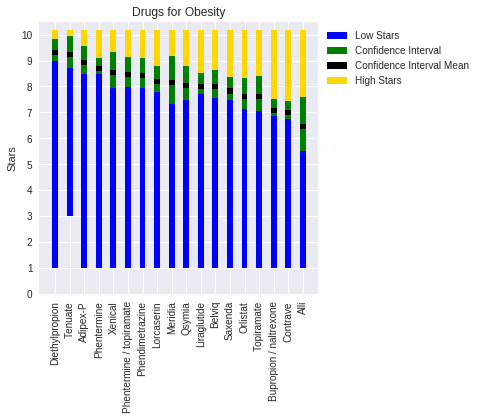

for condition Urinary Tract Infection drug Cipro 95% confidence interval our mean 5.82 lies in the interval 5.07 - 6.58
for condition Urinary Tract Infection drug Bactrim DS 95% confidence interval our mean 5.78 lies in the interval 4.86 - 6.69
for condition Urinary Tract Infection drug Ciprofloxacin 95% confidence interval our mean 5.29 lies in the interval 4.71 - 5.86
for condition Urinary Tract Infection drug Sulfamethoxazole / trimethoprim 95% confidence interval our mean 4.89 lies in the interval 4.43 - 5.34
for condition Urinary Tract Infection drug Bactrim 95% confidence interval our mean 4.86 lies in the interval 4.10 - 5.63
for condition Urinary Tract Infection drug Nitrofurantoin 95% confidence interval our mean 4.82 lies in the interval 4.42 - 5.22
for condition Urinary Tract Infection drug Macrobid 95% confidence interval our mean 4.76 lies in the interval 4.18 - 5.33


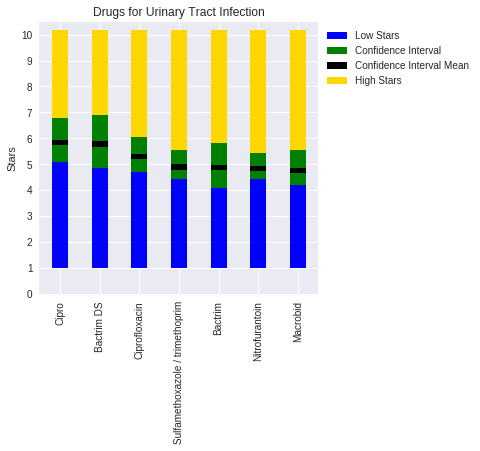

for condition ibromyalgia drug Guaifenesin 95% confidence interval our mean 8.36 lies in the interval 7.63 - 9.09
for condition ibromyalgia drug Tramadol 95% confidence interval our mean 7.40 lies in the interval 6.76 - 8.03
for condition ibromyalgia drug Savella 95% confidence interval our mean 6.83 lies in the interval 6.42 - 7.23
for condition ibromyalgia drug Amitriptyline 95% confidence interval our mean 6.69 lies in the interval 5.85 - 7.54
for condition ibromyalgia drug Gabapentin 95% confidence interval our mean 6.65 lies in the interval 6.01 - 7.29
for condition ibromyalgia drug Milnacipran 95% confidence interval our mean 6.65 lies in the interval 6.22 - 7.08
for condition ibromyalgia drug Lyrica 95% confidence interval our mean 6.60 lies in the interval 6.13 - 7.08
for condition ibromyalgia drug Duloxetine 95% confidence interval our mean 6.54 lies in the interval 6.03 - 7.04
for condition ibromyalgia drug Pregabalin 95% confidence interval our mean 6.50 lies in the interval

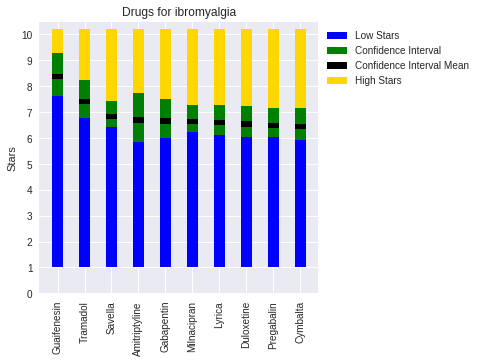

for condition HIV Infection drug Stribild 95% confidence interval our mean 9.47 lies in the interval 9.08 - 9.85
for condition HIV Infection drug Cobicistat / elvitegravir / emtricitabine / tenofovir 95% confidence interval our mean 9.43 lies in the interval 9.08 - 9.79
for condition HIV Infection drug Atripla 95% confidence interval our mean 9.14 lies in the interval 8.75 - 9.53
for condition HIV Infection drug Efavirenz / emtricitabine / tenofovir 95% confidence interval our mean 9.13 lies in the interval 8.79 - 9.47
for condition HIV Infection drug Triumeq 95% confidence interval our mean 8.37 lies in the interval 7.68 - 9.06
for condition HIV Infection drug Emtricitabine / rilpivirine / tenofovir 95% confidence interval our mean 8.31 lies in the interval 7.52 - 9.10
for condition HIV Infection drug Abacavir / dolutegravir / lamivudine 95% confidence interval our mean 8.21 lies in the interval 7.52 - 8.91
for condition HIV Infection drug Complera 95% confidence interval our mean 8.2

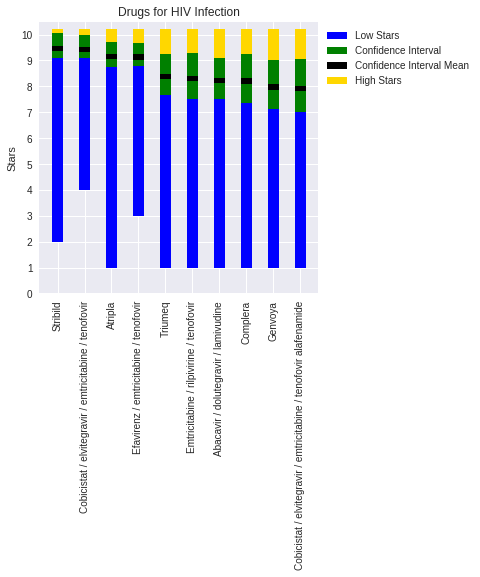

for condition Insomnia drug Seroquel 95% confidence interval our mean 8.34 lies in the interval 7.81 - 8.87
for condition Insomnia drug Lorazepam 95% confidence interval our mean 8.26 lies in the interval 7.50 - 9.02
for condition Insomnia drug Quetiapine 95% confidence interval our mean 7.93 lies in the interval 7.56 - 8.29
for condition Insomnia drug Gabapentin 95% confidence interval our mean 7.89 lies in the interval 7.06 - 8.72
for condition Insomnia drug Clonazepam 95% confidence interval our mean 7.83 lies in the interval 7.06 - 8.59
for condition Insomnia drug Restoril 95% confidence interval our mean 7.81 lies in the interval 7.09 - 8.52
for condition Insomnia drug Zolpidem 95% confidence interval our mean 7.31 lies in the interval 7.04 - 7.59
for condition Insomnia drug Ambien 95% confidence interval our mean 7.30 lies in the interval 6.94 - 7.65
for condition Insomnia drug Mirtazapine 95% confidence interval our mean 7.27 lies in the interval 6.74 - 7.80
for condition Insomn

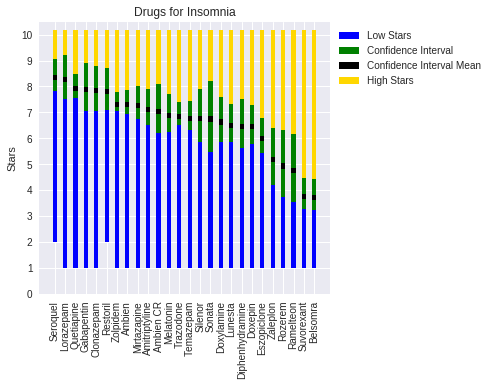

for condition Rheumatoid Arthritis drug Etanercept 95% confidence interval our mean 8.54 lies in the interval 8.01 - 9.07
for condition Rheumatoid Arthritis drug Enbrel 95% confidence interval our mean 8.35 lies in the interval 7.68 - 9.02
for condition Rheumatoid Arthritis drug Rituximab 95% confidence interval our mean 7.89 lies in the interval 6.98 - 8.80
for condition Rheumatoid Arthritis drug Methotrexate 95% confidence interval our mean 7.52 lies in the interval 6.78 - 8.26
for condition Rheumatoid Arthritis drug Adalimumab 95% confidence interval our mean 6.80 lies in the interval 5.98 - 7.62
for condition Rheumatoid Arthritis drug Hydroxychloroquine 95% confidence interval our mean 6.53 lies in the interval 5.72 - 7.35
for condition Rheumatoid Arthritis drug Humira 95% confidence interval our mean 6.41 lies in the interval 5.52 - 7.30


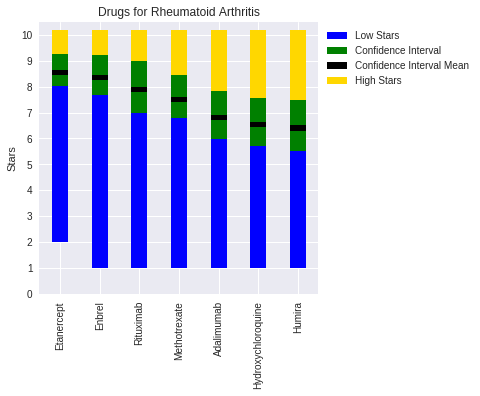

for condition Vaginal Yeast Infection drug Fluconazole 95% confidence interval our mean 6.97 lies in the interval 6.47 - 7.47
for condition Vaginal Yeast Infection drug Diflucan 95% confidence interval our mean 6.46 lies in the interval 5.45 - 7.47
for condition Vaginal Yeast Infection drug Terconazole 95% confidence interval our mean 6.34 lies in the interval 5.25 - 7.43
for condition Vaginal Yeast Infection drug Tioconazole 95% confidence interval our mean 4.48 lies in the interval 4.21 - 4.74
for condition Vaginal Yeast Infection drug Monistat 7-Day Combination Pack 95% confidence interval our mean 3.79 lies in the interval 3.03 - 4.55
for condition Vaginal Yeast Infection drug Monistat 3-Day Combination Pack 95% confidence interval our mean 3.70 lies in the interval 3.07 - 4.34
for condition Vaginal Yeast Infection drug Monistat 7 95% confidence interval our mean 3.03 lies in the interval 2.25 - 3.82
for condition Vaginal Yeast Infection drug Miconazole 95% confidence interval our 

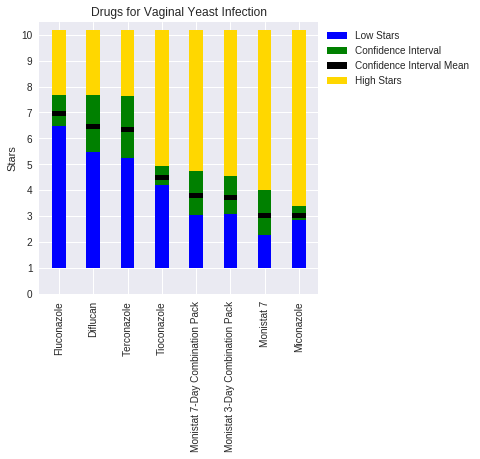

for condition Chlamydia Infection drug Azithromycin 95% confidence interval our mean 7.70 lies in the interval 7.41 - 7.99


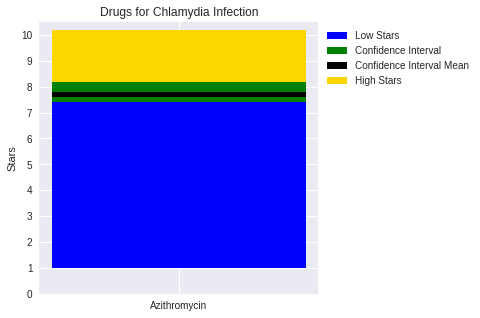

for condition Hirsutism drug Vaniqa 95% confidence interval our mean 8.48 lies in the interval 7.43 - 9.54
for condition Hirsutism drug Eflornithine 95% confidence interval our mean 8.10 lies in the interval 7.07 - 9.13


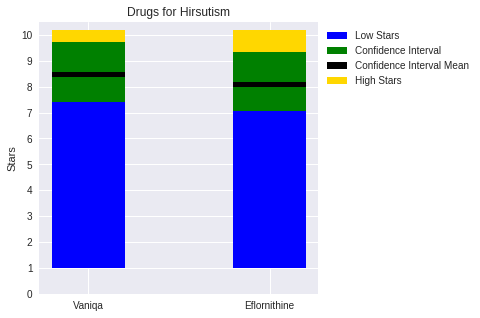

for condition Panic Disorde drug Xanax 95% confidence interval our mean 9.19 lies in the interval 8.89 - 9.48
for condition Panic Disorde drug Alprazolam 95% confidence interval our mean 9.17 lies in the interval 8.91 - 9.44
for condition Panic Disorde drug Clonazepam 95% confidence interval our mean 9.10 lies in the interval 8.81 - 9.38
for condition Panic Disorde drug Klonopin 95% confidence interval our mean 9.00 lies in the interval 8.61 - 9.39
for condition Panic Disorde drug Lorazepam 95% confidence interval our mean 8.95 lies in the interval 8.42 - 9.48
for condition Panic Disorde drug Fluoxetine 95% confidence interval our mean 8.16 lies in the interval 7.26 - 9.07
for condition Panic Disorde drug Paxil 95% confidence interval our mean 8.02 lies in the interval 7.27 - 8.77
for condition Panic Disorde drug Sertraline 95% confidence interval our mean 7.93 lies in the interval 7.57 - 8.30
for condition Panic Disorde drug Zoloft 95% confidence interval our mean 7.88 lies in the int

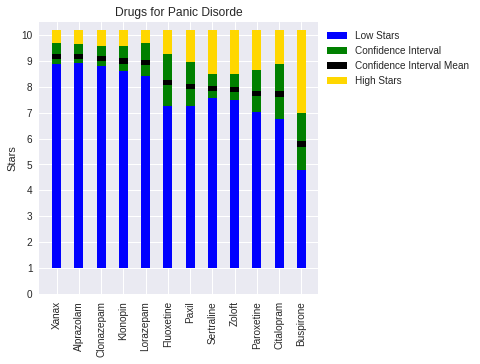

for condition Migraine drug Rizatriptan 95% confidence interval our mean 9.02 lies in the interval 8.72 - 9.32
for condition Migraine drug Treximet 95% confidence interval our mean 9.02 lies in the interval 8.46 - 9.58
for condition Migraine drug Maxalt-MLT 95% confidence interval our mean 8.97 lies in the interval 8.29 - 9.66
for condition Migraine drug Maxalt 95% confidence interval our mean 8.87 lies in the interval 8.35 - 9.40
for condition Migraine drug Naproxen / sumatriptan 95% confidence interval our mean 8.86 lies in the interval 8.33 - 9.39
for condition Migraine drug Relpax 95% confidence interval our mean 8.61 lies in the interval 8.07 - 9.14
for condition Migraine drug Eletriptan 95% confidence interval our mean 8.54 lies in the interval 7.94 - 9.13
for condition Migraine drug Fiorinal 95% confidence interval our mean 8.25 lies in the interval 7.23 - 9.27
for condition Migraine drug Aspirin / butalbital / caffeine 95% confidence interval our mean 8.21 lies in the interval 

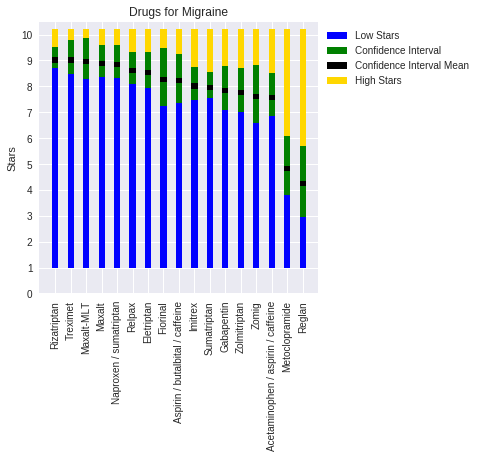

for condition Pain drug Demerol 95% confidence interval our mean 9.42 lies in the interval 9.07 - 9.76
for condition Pain drug Meperidine 95% confidence interval our mean 9.27 lies in the interval 8.86 - 9.68
for condition Pain drug Percocet 95% confidence interval our mean 8.88 lies in the interval 8.59 - 9.18
for condition Pain drug Oxycodone 95% confidence interval our mean 8.86 lies in the interval 8.66 - 9.06
for condition Pain drug OxyContin 95% confidence interval our mean 8.80 lies in the interval 8.48 - 9.12
for condition Pain drug Methadone 95% confidence interval our mean 8.74 lies in the interval 8.35 - 9.13
for condition Pain drug Fentanyl 95% confidence interval our mean 8.58 lies in the interval 8.24 - 8.91
for condition Pain drug Hydrocodone / ibuprofen 95% confidence interval our mean 8.56 lies in the interval 7.95 - 9.17
for condition Pain drug Acetaminophen / oxycodone 95% confidence interval our mean 8.55 lies in the interval 8.27 - 8.82
for condition Pain drug MS C

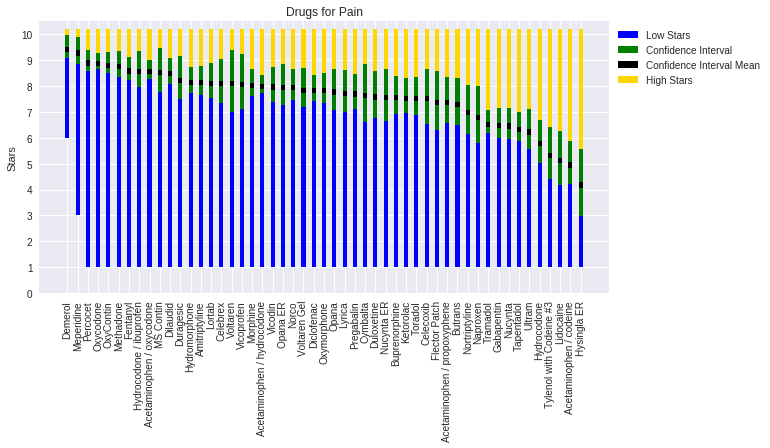

for condition Irritable Bowel Syndrome drug Chlordiazepoxide / clidinium 95% confidence interval our mean 8.97 lies in the interval 8.31 - 9.62
for condition Irritable Bowel Syndrome drug Amitriptyline 95% confidence interval our mean 8.74 lies in the interval 8.18 - 9.31
for condition Irritable Bowel Syndrome drug Hyoscyamine 95% confidence interval our mean 7.97 lies in the interval 7.11 - 8.84
for condition Irritable Bowel Syndrome drug Dicyclomine 95% confidence interval our mean 7.69 lies in the interval 7.13 - 8.25
for condition Irritable Bowel Syndrome drug Bentyl 95% confidence interval our mean 7.45 lies in the interval 6.49 - 8.40
for condition Irritable Bowel Syndrome drug Linaclotide 95% confidence interval our mean 7.26 lies in the interval 6.61 - 7.91
for condition Irritable Bowel Syndrome drug Linzess 95% confidence interval our mean 7.23 lies in the interval 6.58 - 7.87
for condition Irritable Bowel Syndrome drug Eluxadoline 95% confidence interval our mean 6.73 lies in

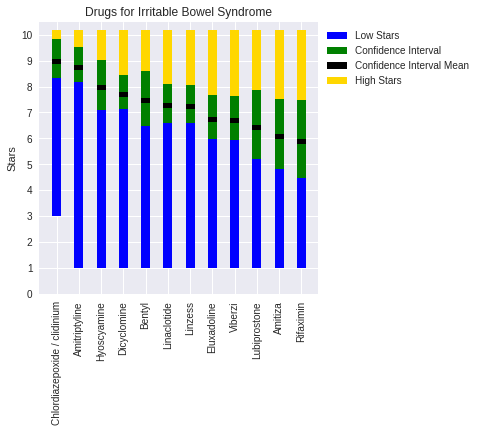

for condition Osteoarthritis drug Voltaren Gel 95% confidence interval our mean 8.41 lies in the interval 7.49 - 9.32
for condition Osteoarthritis drug Diclofenac 95% confidence interval our mean 8.32 lies in the interval 7.83 - 8.82
for condition Osteoarthritis drug Celebrex 95% confidence interval our mean 7.85 lies in the interval 6.94 - 8.76
for condition Osteoarthritis drug Celecoxib 95% confidence interval our mean 7.76 lies in the interval 6.89 - 8.62
for condition Osteoarthritis drug Meloxicam 95% confidence interval our mean 7.33 lies in the interval 6.64 - 8.02
for condition Osteoarthritis drug Hyaluronan 95% confidence interval our mean 6.69 lies in the interval 5.90 - 7.48
for condition Osteoarthritis drug Orthovisc 95% confidence interval our mean 6.62 lies in the interval 5.81 - 7.44
for condition Osteoarthritis drug Sodium hyaluronate 95% confidence interval our mean 6.53 lies in the interval 5.86 - 7.21
for condition Osteoarthritis drug Synvisc-One 95% confidence interv

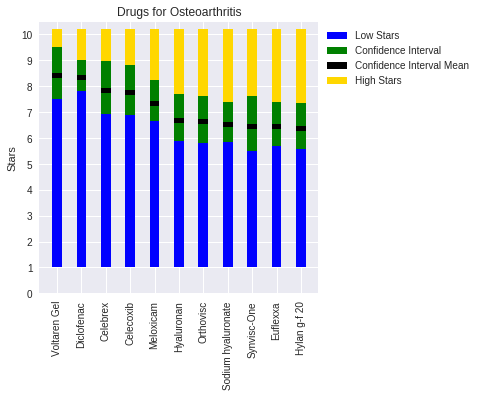

for condition Constipation drug Magnesium citrate 95% confidence interval our mean 9.06 lies in the interval 8.79 - 9.33
for condition Constipation drug MiraLax 95% confidence interval our mean 9.01 lies in the interval 8.59 - 9.44
for condition Constipation drug Polyethylene glycol 3350 95% confidence interval our mean 8.84 lies in the interval 8.37 - 9.30
for condition Constipation drug Phillips' Milk of Magnesia 95% confidence interval our mean 8.75 lies in the interval 8.23 - 9.26
for condition Constipation drug Magnesium hydroxide 95% confidence interval our mean 8.71 lies in the interval 8.26 - 9.17
for condition Constipation drug Linzess 95% confidence interval our mean 7.19 lies in the interval 6.04 - 8.35
for condition Constipation drug Linaclotide 95% confidence interval our mean 6.78 lies in the interval 5.55 - 8.01
for condition Constipation drug Senna 95% confidence interval our mean 6.29 lies in the interval 5.34 - 7.25
for condition Constipation drug Dulcolax 95% confide

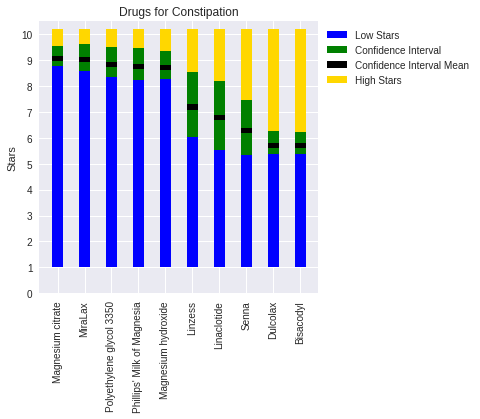

for condition Bowel Preparation drug Magnesium sulfate / potassium sulfate / sodium sulfate 95% confidence interval our mean 7.56 lies in the interval 7.34 - 7.78
for condition Bowel Preparation drug Suprep Bowel Prep Kit 95% confidence interval our mean 7.46 lies in the interval 7.23 - 7.70
for condition Bowel Preparation drug MoviPrep 95% confidence interval our mean 6.99 lies in the interval 6.45 - 7.53
for condition Bowel Preparation drug Polyethylene glycol 3350 with electrolytes 95% confidence interval our mean 6.84 lies in the interval 6.39 - 7.29
for condition Bowel Preparation drug Citric acid / magnesium oxide / sodium picosulfate 95% confidence interval our mean 6.14 lies in the interval 5.24 - 7.03
for condition Bowel Preparation drug Prepopik 95% confidence interval our mean 6.00 lies in the interval 5.13 - 6.87
for condition Bowel Preparation drug Bisacodyl 95% confidence interval our mean 5.92 lies in the interval 4.75 - 7.10


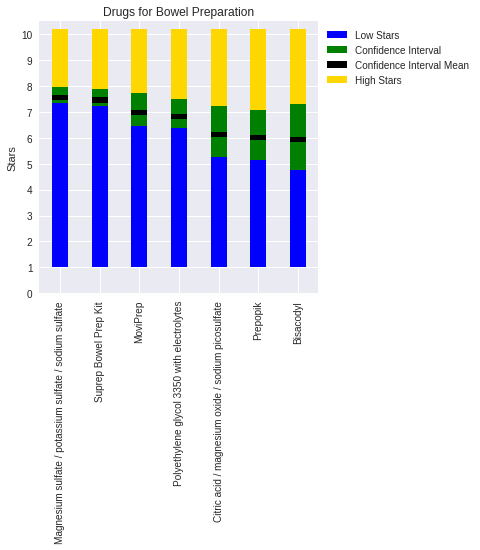

for condition Muscle Spasm drug Carisoprodol 95% confidence interval our mean 9.17 lies in the interval 8.85 - 9.48
for condition Muscle Spasm drug Soma 95% confidence interval our mean 9.07 lies in the interval 8.67 - 9.47
for condition Muscle Spasm drug Diazepam 95% confidence interval our mean 8.79 lies in the interval 8.29 - 9.29
for condition Muscle Spasm drug Valium 95% confidence interval our mean 8.60 lies in the interval 7.92 - 9.28
for condition Muscle Spasm drug Skelaxin 95% confidence interval our mean 7.73 lies in the interval 6.92 - 8.55
for condition Muscle Spasm drug Metaxalone 95% confidence interval our mean 7.65 lies in the interval 6.86 - 8.44
for condition Muscle Spasm drug Zanaflex 95% confidence interval our mean 7.49 lies in the interval 6.76 - 8.22
for condition Muscle Spasm drug Baclofen 95% confidence interval our mean 6.95 lies in the interval 6.15 - 7.75
for condition Muscle Spasm drug Chlorzoxazone 95% confidence interval our mean 6.66 lies in the interval

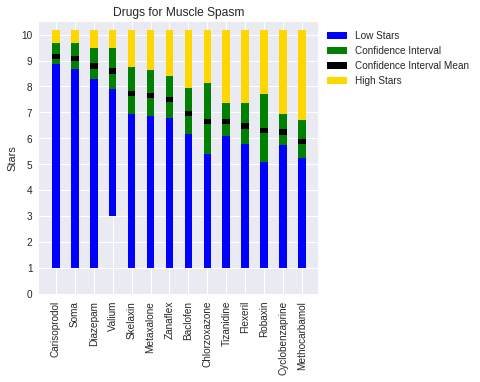

for condition Hepatitis C drug Ledipasvir / sofosbuvir 95% confidence interval our mean 8.87 lies in the interval 8.54 - 9.19
for condition Hepatitis C drug Harvoni 95% confidence interval our mean 8.67 lies in the interval 8.31 - 9.02
for condition Hepatitis C drug Epclusa 95% confidence interval our mean 8.16 lies in the interval 7.42 - 8.90
for condition Hepatitis C drug Sofosbuvir / velpatasvir 95% confidence interval our mean 7.94 lies in the interval 7.26 - 8.61
for condition Hepatitis C drug Sovaldi 95% confidence interval our mean 7.48 lies in the interval 6.16 - 8.81


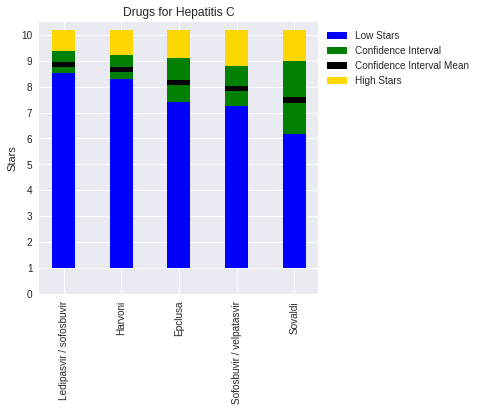

for condition Overactive Bladde drug Oxybutynin 95% confidence interval our mean 6.55 lies in the interval 5.83 - 7.26
for condition Overactive Bladde drug Myrbetriq 95% confidence interval our mean 5.65 lies in the interval 4.68 - 6.62
for condition Overactive Bladde drug Solifenacin 95% confidence interval our mean 5.56 lies in the interval 4.63 - 6.49
for condition Overactive Bladde drug Botox 95% confidence interval our mean 5.55 lies in the interval 4.52 - 6.59
for condition Overactive Bladde drug VESIcare 95% confidence interval our mean 5.33 lies in the interval 4.37 - 6.30
for condition Overactive Bladde drug OnabotulinumtoxinA 95% confidence interval our mean 5.20 lies in the interval 4.16 - 6.24
for condition Overactive Bladde drug Mirabegron 95% confidence interval our mean 5.17 lies in the interval 4.35 - 5.99


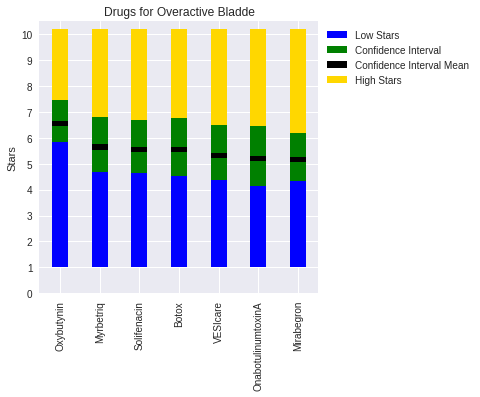

for condition Diabetes, Type 2 drug Byetta 95% confidence interval our mean 8.18 lies in the interval 7.50 - 8.85
for condition Diabetes, Type 2 drug Victoza 95% confidence interval our mean 7.98 lies in the interval 7.64 - 8.32
for condition Diabetes, Type 2 drug Liraglutide 95% confidence interval our mean 7.72 lies in the interval 7.37 - 8.07
for condition Diabetes, Type 2 drug Glimepiride 95% confidence interval our mean 7.67 lies in the interval 6.58 - 8.75
for condition Diabetes, Type 2 drug Insulin glargine 95% confidence interval our mean 7.24 lies in the interval 6.32 - 8.15
for condition Diabetes, Type 2 drug Exenatide 95% confidence interval our mean 7.20 lies in the interval 6.77 - 7.62
for condition Diabetes, Type 2 drug Empagliflozin 95% confidence interval our mean 7.10 lies in the interval 6.10 - 8.10
for condition Diabetes, Type 2 drug Bydureon 95% confidence interval our mean 7.06 lies in the interval 6.55 - 7.57
for condition Diabetes, Type 2 drug Jardiance 95% confi

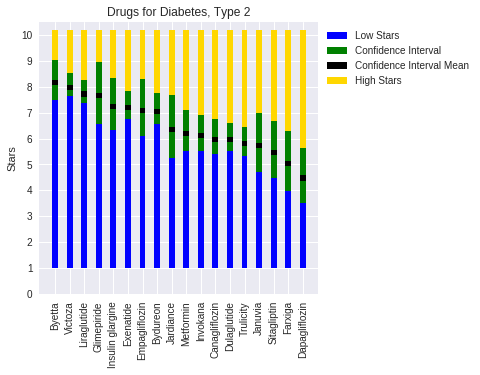

for condition Asthma, Maintenance drug Xolair 95% confidence interval our mean 8.32 lies in the interval 7.18 - 9.46
for condition Asthma, Maintenance drug Omalizumab 95% confidence interval our mean 8.16 lies in the interval 6.96 - 9.35
for condition Asthma, Maintenance drug Fluticasone / salmeterol 95% confidence interval our mean 8.10 lies in the interval 7.35 - 8.85
for condition Asthma, Maintenance drug Advair Diskus 95% confidence interval our mean 8.07 lies in the interval 7.23 - 8.91
for condition Asthma, Maintenance drug Symbicort 95% confidence interval our mean 7.55 lies in the interval 6.75 - 8.34
for condition Asthma, Maintenance drug Montelukast 95% confidence interval our mean 6.23 lies in the interval 5.02 - 7.45


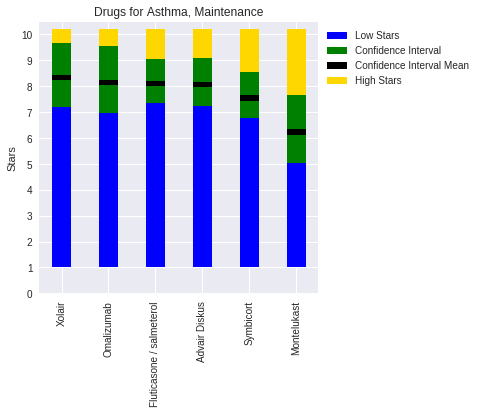

for condition Schizophrenia drug Aripiprazole 95% confidence interval our mean 6.89 lies in the interval 5.94 - 7.84
for condition Schizophrenia drug Lurasidone 95% confidence interval our mean 6.62 lies in the interval 5.68 - 7.56
for condition Schizophrenia drug Latuda 95% confidence interval our mean 6.51 lies in the interval 5.55 - 7.47
for condition Schizophrenia drug Abilify 95% confidence interval our mean 6.36 lies in the interval 5.22 - 7.50
for condition Schizophrenia drug Paliperidone 95% confidence interval our mean 6.02 lies in the interval 5.00 - 7.04
for condition Schizophrenia drug Risperidone 95% confidence interval our mean 5.64 lies in the interval 4.55 - 6.73


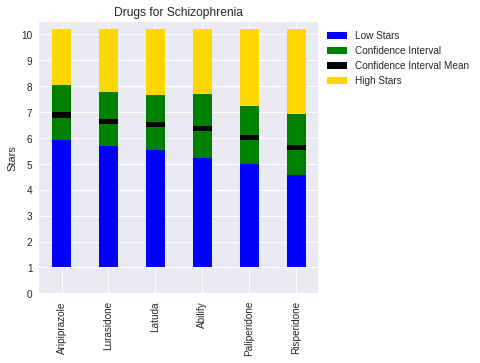

for condition Dysuria drug Phenazopyridine 95% confidence interval our mean 6.16 lies in the interval 5.00 - 7.33


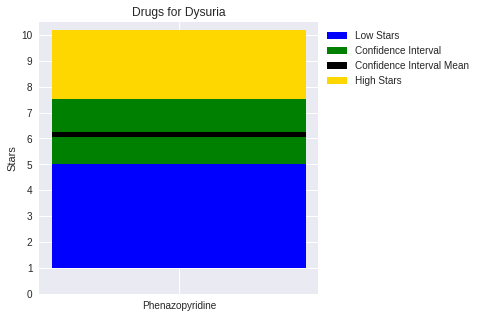

for condition Smoking Cessation drug Chantix 95% confidence interval our mean 8.88 lies in the interval 8.71 - 9.06
for condition Smoking Cessation drug Varenicline 95% confidence interval our mean 8.84 lies in the interval 8.69 - 8.99
for condition Smoking Cessation drug Zyban 95% confidence interval our mean 8.74 lies in the interval 8.12 - 9.37
for condition Smoking Cessation drug Bupropion 95% confidence interval our mean 8.31 lies in the interval 7.88 - 8.73
for condition Smoking Cessation drug Nicotine 95% confidence interval our mean 8.24 lies in the interval 7.69 - 8.78


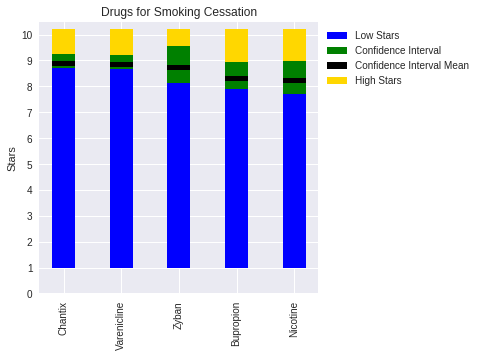

for condition Anxiety drug Tramadol 95% confidence interval our mean 9.45 lies in the interval 9.15 - 9.76
for condition Anxiety drug Valium 95% confidence interval our mean 9.07 lies in the interval 8.65 - 9.49
for condition Anxiety drug Alprazolam 95% confidence interval our mean 8.87 lies in the interval 8.66 - 9.07
for condition Anxiety drug Diazepam 95% confidence interval our mean 8.86 lies in the interval 8.55 - 9.16
for condition Anxiety drug Xanax 95% confidence interval our mean 8.71 lies in the interval 8.44 - 8.98
for condition Anxiety drug Klonopin 95% confidence interval our mean 8.68 lies in the interval 8.39 - 8.98
for condition Anxiety drug Clonazepam 95% confidence interval our mean 8.61 lies in the interval 8.38 - 8.84
for condition Anxiety drug Lorazepam 95% confidence interval our mean 8.33 lies in the interval 8.04 - 8.61
for condition Anxiety drug Ativan 95% confidence interval our mean 8.27 lies in the interval 7.86 - 8.69
for condition Anxiety drug Gabapentin 9

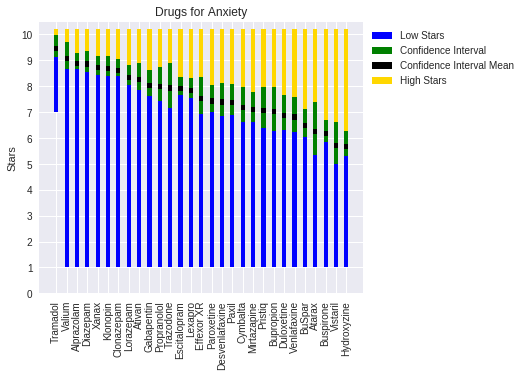

for condition Acne drug Bactrim 95% confidence interval our mean 8.90 lies in the interval 8.31 - 9.50
for condition Acne drug Benzaclin 95% confidence interval our mean 8.87 lies in the interval 8.27 - 9.46
for condition Acne drug Accutane 95% confidence interval our mean 8.40 lies in the interval 8.12 - 8.68
for condition Acne drug Sulfamethoxazole / trimethoprim 95% confidence interval our mean 8.39 lies in the interval 7.87 - 8.91
for condition Acne drug Isotretinoin 95% confidence interval our mean 8.38 lies in the interval 8.17 - 8.59
for condition Acne drug Retin-A 95% confidence interval our mean 8.28 lies in the interval 7.46 - 9.11
for condition Acne drug Claravis 95% confidence interval our mean 8.25 lies in the interval 7.74 - 8.76
for condition Acne drug Tretinoin 95% confidence interval our mean 7.88 lies in the interval 7.53 - 8.23
for condition Acne drug Benzoyl peroxide / clindamycin 95% confidence interval our mean 7.78 lies in the interval 7.44 - 8.13
for condition A

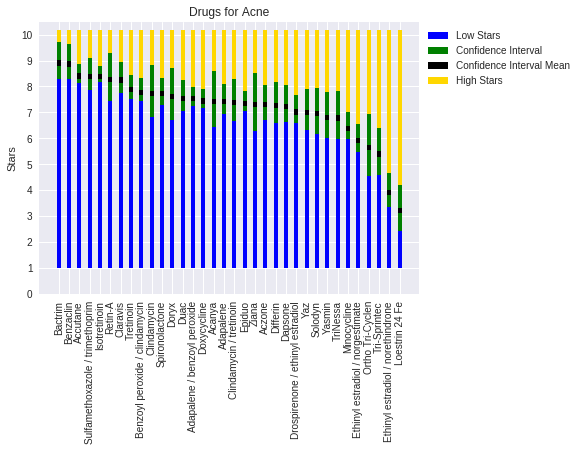

for condition emale Infertility drug Clomiphene 95% confidence interval our mean 7.32 lies in the interval 5.92 - 8.72


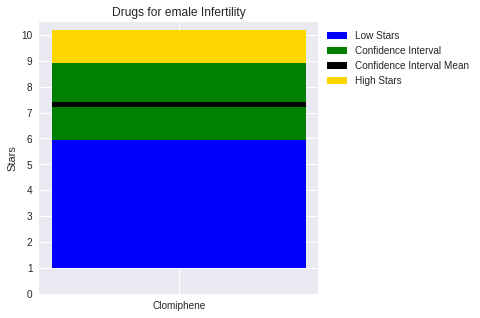

for condition Constipation, Drug Induced drug Naloxegol 95% confidence interval our mean 4.82 lies in the interval 4.01 - 5.63
for condition Constipation, Drug Induced drug Movantik 95% confidence interval our mean 4.25 lies in the interval 3.46 - 5.04


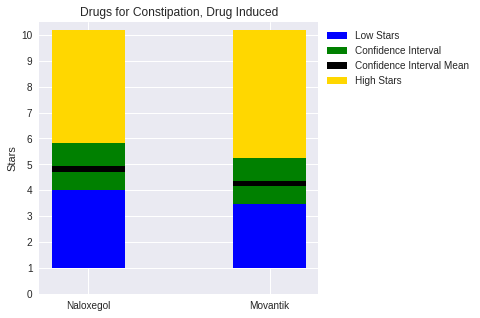

for condition Erectile Dysfunction drug Viagra 95% confidence interval our mean 8.79 lies in the interval 8.33 - 9.26
for condition Erectile Dysfunction drug Tadalafil 95% confidence interval our mean 8.67 lies in the interval 8.38 - 8.96
for condition Erectile Dysfunction drug Cialis 95% confidence interval our mean 8.64 lies in the interval 8.32 - 8.95
for condition Erectile Dysfunction drug Sildenafil 95% confidence interval our mean 8.53 lies in the interval 8.13 - 8.94
for condition Erectile Dysfunction drug Vardenafil 95% confidence interval our mean 8.10 lies in the interval 7.59 - 8.61
for condition Erectile Dysfunction drug Levitra 95% confidence interval our mean 8.10 lies in the interval 7.49 - 8.71
for condition Erectile Dysfunction drug Alprostadil 95% confidence interval our mean 7.83 lies in the interval 7.05 - 8.60


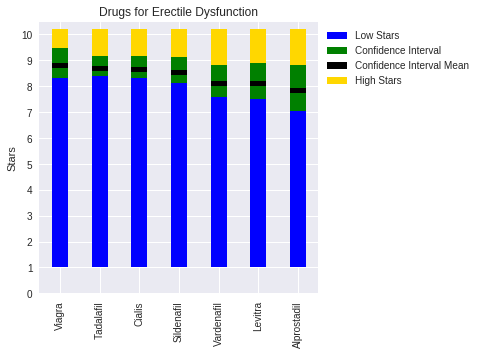

for condition Trigeminal Neuralgia drug Carbamazepine 95% confidence interval our mean 6.75 lies in the interval 6.02 - 7.49


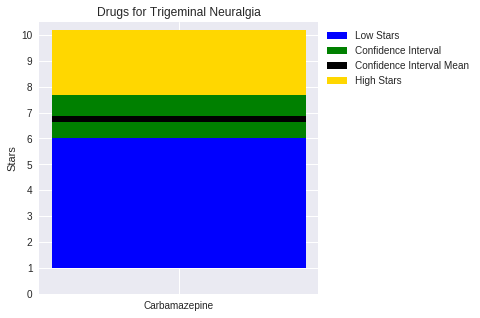

for condition Underactive Thyroid drug Armour Thyroid 95% confidence interval our mean 7.69 lies in the interval 6.89 - 8.49
for condition Underactive Thyroid drug Thyroid desiccated 95% confidence interval our mean 7.65 lies in the interval 6.93 - 8.37
for condition Underactive Thyroid drug Synthroid 95% confidence interval our mean 6.84 lies in the interval 5.78 - 7.89
for condition Underactive Thyroid drug Levothyroxine 95% confidence interval our mean 6.41 lies in the interval 5.90 - 6.93


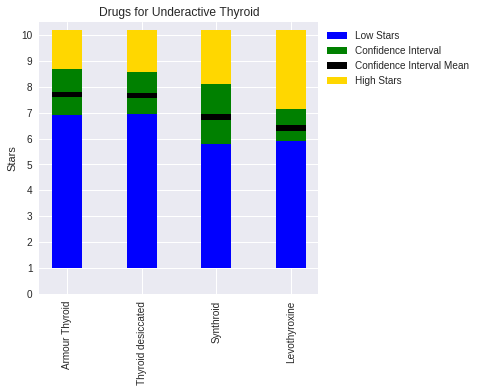

for condition Chronic Pain drug Methadone 95% confidence interval our mean 8.98 lies in the interval 8.56 - 9.39
for condition Chronic Pain drug Dilaudid 95% confidence interval our mean 8.94 lies in the interval 8.23 - 9.65
for condition Chronic Pain drug Hydromorphone 95% confidence interval our mean 8.38 lies in the interval 7.81 - 8.94
for condition Chronic Pain drug MS Contin 95% confidence interval our mean 8.18 lies in the interval 7.32 - 9.05
for condition Chronic Pain drug Fentanyl 95% confidence interval our mean 8.11 lies in the interval 7.70 - 8.52
for condition Chronic Pain drug Acetaminophen / oxycodone 95% confidence interval our mean 8.00 lies in the interval 7.50 - 8.50
for condition Chronic Pain drug Oxycodone 95% confidence interval our mean 7.99 lies in the interval 7.59 - 8.38
for condition Chronic Pain drug OxyContin 95% confidence interval our mean 7.88 lies in the interval 7.17 - 8.60
for condition Chronic Pain drug Morphine 95% confidence interval our mean 7.64

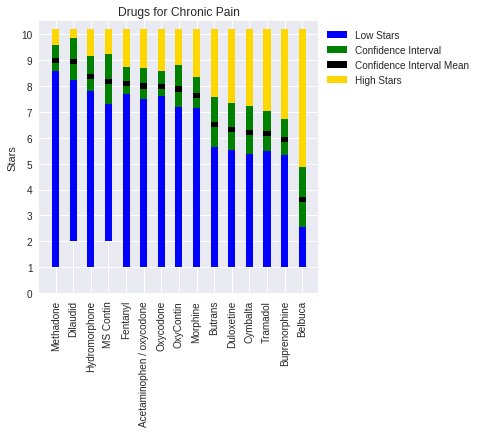

for condition Atrophic Vaginitis drug Estradiol 95% confidence interval our mean 5.71 lies in the interval 4.98 - 6.45


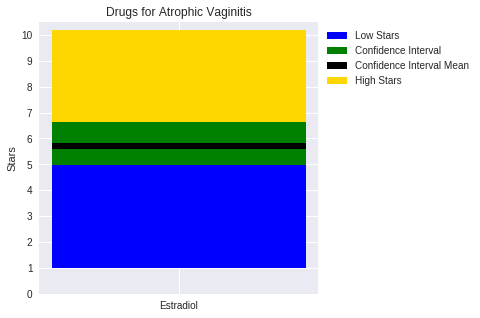

for condition Major Depressive Disorde drug Fluoxetine 95% confidence interval our mean 7.72 lies in the interval 6.61 - 8.83
for condition Major Depressive Disorde drug Wellbutrin 95% confidence interval our mean 7.16 lies in the interval 6.17 - 8.15
for condition Major Depressive Disorde drug Zoloft 95% confidence interval our mean 7.13 lies in the interval 6.15 - 8.10
for condition Major Depressive Disorde drug Bupropion 95% confidence interval our mean 7.07 lies in the interval 6.49 - 7.66
for condition Major Depressive Disorde drug Duloxetine 95% confidence interval our mean 7.06 lies in the interval 5.89 - 8.23
for condition Major Depressive Disorde drug Wellbutrin XL 95% confidence interval our mean 7.06 lies in the interval 5.97 - 8.14
for condition Major Depressive Disorde drug Escitalopram 95% confidence interval our mean 7.00 lies in the interval 6.14 - 7.86
for condition Major Depressive Disorde drug Sertraline 95% confidence interval our mean 6.91 lies in the interval 6.05

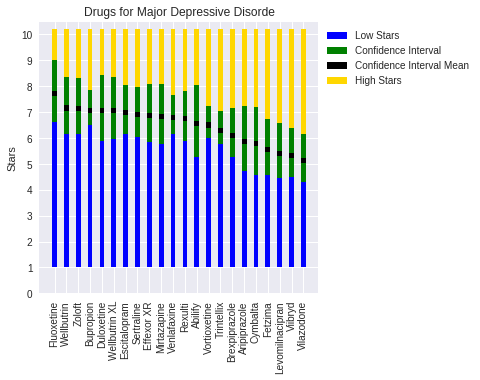

for condition Anxiety and Stress drug Zoloft 95% confidence interval our mean 7.88 lies in the interval 7.25 - 8.51
for condition Anxiety and Stress drug Citalopram 95% confidence interval our mean 7.69 lies in the interval 7.43 - 7.94
for condition Anxiety and Stress drug Effexor 95% confidence interval our mean 7.67 lies in the interval 6.79 - 8.54
for condition Anxiety and Stress drug Prozac 95% confidence interval our mean 7.65 lies in the interval 7.21 - 8.10
for condition Anxiety and Stress drug Fluoxetine 95% confidence interval our mean 7.64 lies in the interval 7.27 - 8.00
for condition Anxiety and Stress drug Celexa 95% confidence interval our mean 7.54 lies in the interval 7.19 - 7.89
for condition Anxiety and Stress drug Sertraline 95% confidence interval our mean 7.46 lies in the interval 7.06 - 7.86
for condition Anxiety and Stress drug Amitriptyline 95% confidence interval our mean 7.45 lies in the interval 6.64 - 8.27
for condition Anxiety and Stress drug Venlafaxine 95

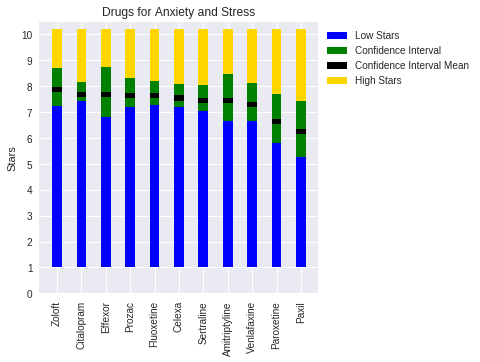

for condition Rosacea drug Oracea 95% confidence interval our mean 8.43 lies in the interval 7.59 - 9.28
for condition Rosacea drug Doxycycline 95% confidence interval our mean 8.27 lies in the interval 7.57 - 8.98
for condition Rosacea drug Azelaic acid 95% confidence interval our mean 8.00 lies in the interval 6.96 - 9.04
for condition Rosacea drug Ivermectin 95% confidence interval our mean 7.53 lies in the interval 6.60 - 8.45
for condition Rosacea drug Soolantra 95% confidence interval our mean 7.51 lies in the interval 6.50 - 8.52
for condition Rosacea drug Metronidazole 95% confidence interval our mean 6.95 lies in the interval 5.84 - 8.06
for condition Rosacea drug Mirvaso 95% confidence interval our mean 3.78 lies in the interval 2.80 - 4.76
for condition Rosacea drug Brimonidine 95% confidence interval our mean 3.69 lies in the interval 2.76 - 4.61


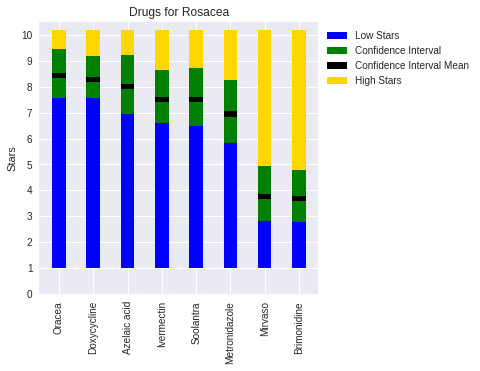

for condition High Blood Pressure drug Azor 95% confidence interval our mean 8.85 lies in the interval 8.28 - 9.42
for condition High Blood Pressure drug Amlodipine / olmesartan 95% confidence interval our mean 8.74 lies in the interval 7.97 - 9.50
for condition High Blood Pressure drug Olmesartan 95% confidence interval our mean 7.60 lies in the interval 6.98 - 8.22
for condition High Blood Pressure drug Benicar 95% confidence interval our mean 7.36 lies in the interval 6.64 - 8.09
for condition High Blood Pressure drug Hydrochlorothiazide / lisinopril 95% confidence interval our mean 6.97 lies in the interval 5.93 - 8.01
for condition High Blood Pressure drug Nebivolol 95% confidence interval our mean 6.76 lies in the interval 6.12 - 7.41
for condition High Blood Pressure drug Atenolol 95% confidence interval our mean 6.69 lies in the interval 5.89 - 7.50
for condition High Blood Pressure drug Clonidine 95% confidence interval our mean 6.64 lies in the interval 5.50 - 7.77
for condit

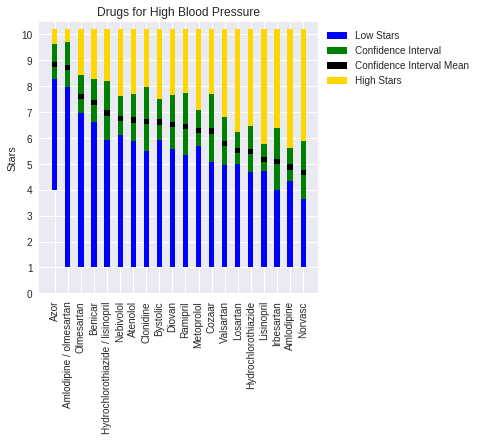

for condition Restless Legs Syndrome drug Tramadol 95% confidence interval our mean 8.58 lies in the interval 7.92 - 9.24
for condition Restless Legs Syndrome drug Gabapentin 95% confidence interval our mean 8.30 lies in the interval 7.58 - 9.01
for condition Restless Legs Syndrome drug Mirapex 95% confidence interval our mean 8.00 lies in the interval 7.26 - 8.74
for condition Restless Legs Syndrome drug Clonazepam 95% confidence interval our mean 8.00 lies in the interval 7.10 - 8.90
for condition Restless Legs Syndrome drug Pramipexole 95% confidence interval our mean 7.58 lies in the interval 6.91 - 8.24
for condition Restless Legs Syndrome drug Ropinirole 95% confidence interval our mean 6.96 lies in the interval 6.40 - 7.52
for condition Restless Legs Syndrome drug Requip 95% confidence interval our mean 6.86 lies in the interval 5.90 - 7.82


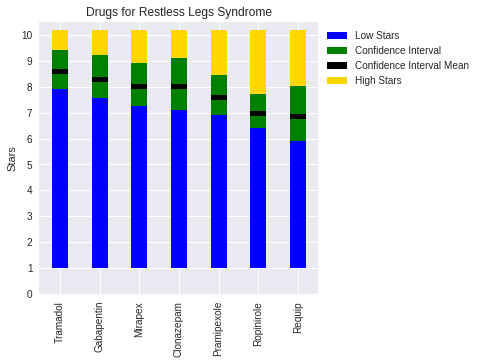

for condition Bronchitis drug Zithromax 95% confidence interval our mean 6.67 lies in the interval 5.32 - 8.01
for condition Bronchitis drug Azithromycin 95% confidence interval our mean 6.49 lies in the interval 5.80 - 7.18
for condition Bronchitis drug Levofloxacin 95% confidence interval our mean 5.62 lies in the interval 4.67 - 6.58
for condition Bronchitis drug Clarithromycin 95% confidence interval our mean 4.71 lies in the interval 3.87 - 5.55
for condition Bronchitis drug Levaquin 95% confidence interval our mean 4.68 lies in the interval 3.33 - 6.02


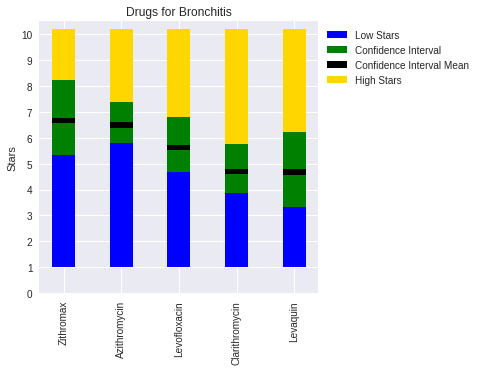

for condition Skin or Soft Tissue Infection drug Cephalexin 95% confidence interval our mean 6.83 lies in the interval 5.98 - 7.67
for condition Skin or Soft Tissue Infection drug Clindamycin 95% confidence interval our mean 6.55 lies in the interval 5.52 - 7.58


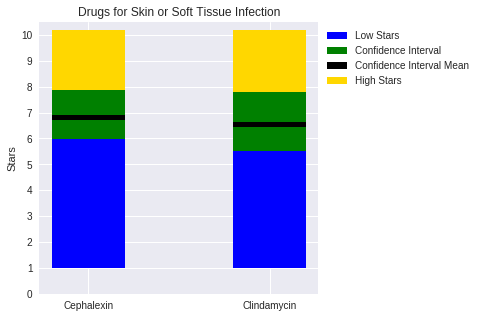

for condition Obsessive Compulsive Disorde drug Clomipramine 95% confidence interval our mean 8.52 lies in the interval 7.94 - 9.10
for condition Obsessive Compulsive Disorde drug Prozac 95% confidence interval our mean 8.32 lies in the interval 7.55 - 9.09
for condition Obsessive Compulsive Disorde drug Sertraline 95% confidence interval our mean 8.19 lies in the interval 7.73 - 8.65
for condition Obsessive Compulsive Disorde drug Luvox 95% confidence interval our mean 8.10 lies in the interval 7.36 - 8.85
for condition Obsessive Compulsive Disorde drug Fluvoxamine 95% confidence interval our mean 8.09 lies in the interval 7.55 - 8.63
for condition Obsessive Compulsive Disorde drug Zoloft 95% confidence interval our mean 8.04 lies in the interval 7.48 - 8.60
for condition Obsessive Compulsive Disorde drug Fluoxetine 95% confidence interval our mean 8.02 lies in the interval 7.25 - 8.79


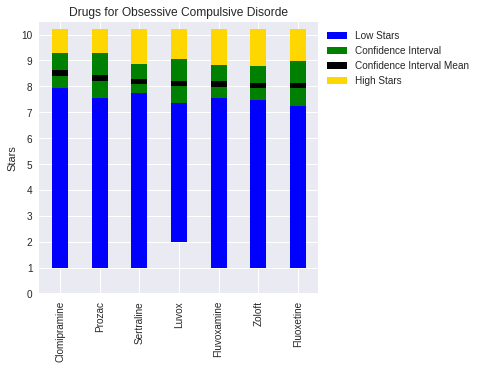

for condition Endometriosis drug Ethinyl estradiol / norethindrone 95% confidence interval our mean 6.47 lies in the interval 5.51 - 7.42
for condition Endometriosis drug Ethinyl estradiol / norgestimate 95% confidence interval our mean 6.24 lies in the interval 5.07 - 7.40
for condition Endometriosis drug Ethinyl estradiol / levonorgestrel 95% confidence interval our mean 6.15 lies in the interval 5.27 - 7.03
for condition Endometriosis drug Medroxyprogesterone 95% confidence interval our mean 5.87 lies in the interval 4.70 - 7.04
for condition Endometriosis drug Leuprolide 95% confidence interval our mean 5.85 lies in the interval 5.07 - 6.62
for condition Endometriosis drug Lupron Depot 95% confidence interval our mean 5.68 lies in the interval 4.79 - 6.58


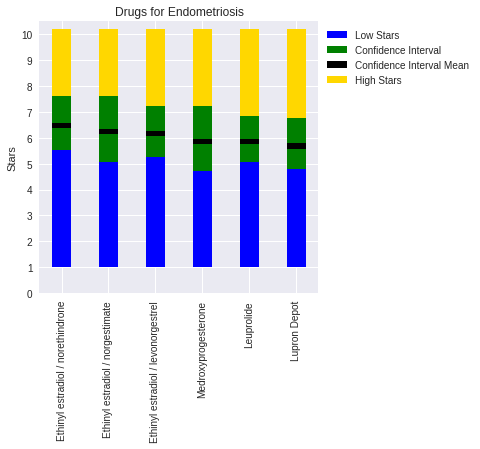

for condition Seizures drug Vimpat 95% confidence interval our mean 7.18 lies in the interval 6.51 - 7.85
for condition Seizures drug Lacosamide 95% confidence interval our mean 7.13 lies in the interval 6.52 - 7.75
for condition Seizures drug Zonisamide 95% confidence interval our mean 7.10 lies in the interval 5.96 - 8.23
for condition Seizures drug Levetiracetam 95% confidence interval our mean 6.56 lies in the interval 5.94 - 7.19
for condition Seizures drug Keppra 95% confidence interval our mean 6.43 lies in the interval 5.73 - 7.13


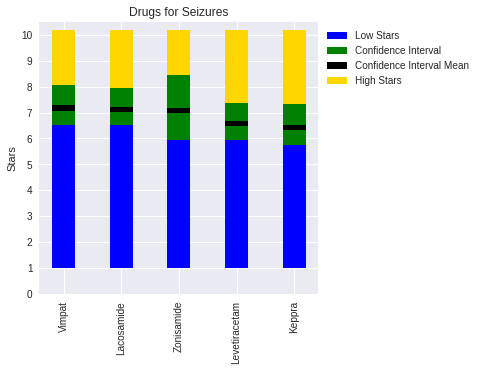

for condition Neuropathic Pain drug Gabapentin 95% confidence interval our mean 6.74 lies in the interval 5.94 - 7.53
for condition Neuropathic Pain drug Pregabalin 95% confidence interval our mean 6.52 lies in the interval 5.87 - 7.17
for condition Neuropathic Pain drug Lyrica 95% confidence interval our mean 6.21 lies in the interval 5.48 - 6.95


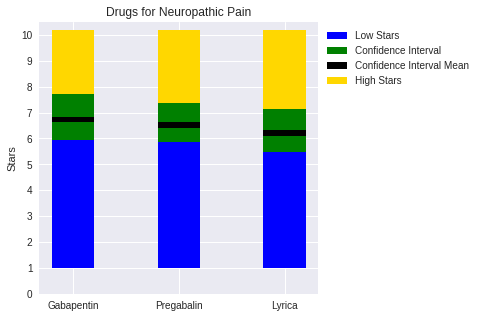

for condition Sedation drug Trazodone 95% confidence interval our mean 7.76 lies in the interval 7.01 - 8.51
for condition Sedation drug Hydroxyzine 95% confidence interval our mean 6.15 lies in the interval 5.16 - 7.14


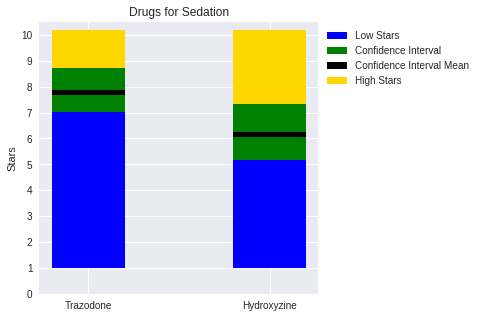

for condition Menstrual Disorders drug Tranexamic acid 95% confidence interval our mean 7.63 lies in the interval 6.44 - 8.82
for condition Menstrual Disorders drug Loestrin 24 Fe 95% confidence interval our mean 5.90 lies in the interval 4.59 - 7.21
for condition Menstrual Disorders drug Drospirenone / ethinyl estradiol 95% confidence interval our mean 5.55 lies in the interval 4.66 - 6.45
for condition Menstrual Disorders drug Ethinyl estradiol / norethindrone 95% confidence interval our mean 5.49 lies in the interval 4.80 - 6.19


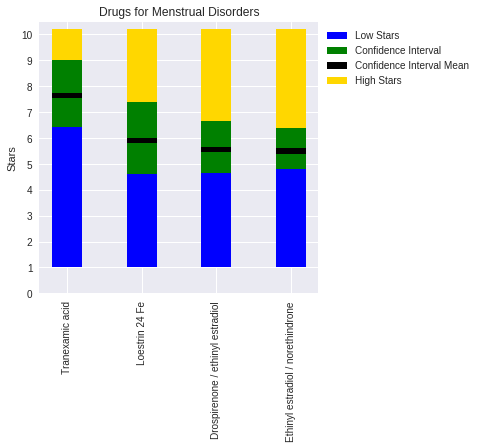

for condition Allergic Rhinitis drug Azelastine 95% confidence interval our mean 8.10 lies in the interval 7.12 - 9.07
for condition Allergic Rhinitis drug Singulair 95% confidence interval our mean 7.11 lies in the interval 5.85 - 8.37
for condition Allergic Rhinitis drug Zyrtec 95% confidence interval our mean 7.08 lies in the interval 6.06 - 8.09
for condition Allergic Rhinitis drug Fexofenadine 95% confidence interval our mean 6.87 lies in the interval 5.78 - 7.95
for condition Allergic Rhinitis drug Triamcinolone 95% confidence interval our mean 6.65 lies in the interval 5.41 - 7.89
for condition Allergic Rhinitis drug Dymista 95% confidence interval our mean 6.57 lies in the interval 5.47 - 7.67
for condition Allergic Rhinitis drug Azelastine / fluticasone 95% confidence interval our mean 6.55 lies in the interval 5.46 - 7.65
for condition Allergic Rhinitis drug Cetirizine 95% confidence interval our mean 6.51 lies in the interval 5.70 - 7.31
for condition Allergic Rhinitis drug 

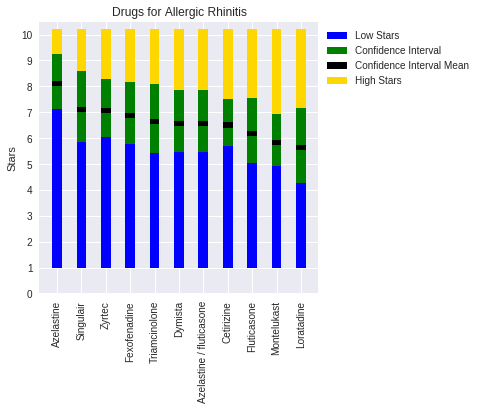

for condition Anesthesia drug Propofol 95% confidence interval our mean 8.15 lies in the interval 7.72 - 8.59


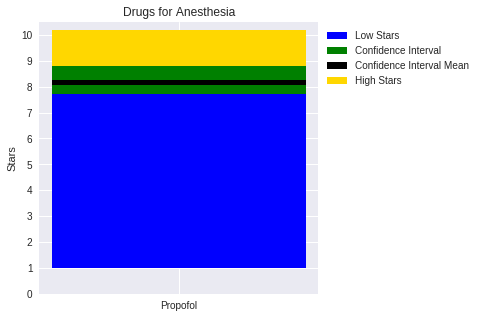

for condition Abnormal Uterine Bleeding drug Loestrin 24 Fe 95% confidence interval our mean 6.42 lies in the interval 5.41 - 7.44
for condition Abnormal Uterine Bleeding drug Ethinyl estradiol / norethindrone 95% confidence interval our mean 5.44 lies in the interval 4.76 - 6.11
for condition Abnormal Uterine Bleeding drug Levonorgestrel 95% confidence interval our mean 5.32 lies in the interval 4.91 - 5.73
for condition Abnormal Uterine Bleeding drug Mirena 95% confidence interval our mean 5.22 lies in the interval 4.80 - 5.64
for condition Abnormal Uterine Bleeding drug Provera 95% confidence interval our mean 4.67 lies in the interval 3.45 - 5.88
for condition Abnormal Uterine Bleeding drug Ethinyl estradiol / norgestimate 95% confidence interval our mean 4.46 lies in the interval 3.90 - 5.01
for condition Abnormal Uterine Bleeding drug Ethinyl estradiol / levonorgestrel 95% confidence interval our mean 4.39 lies in the interval 3.77 - 5.01
for condition Abnormal Uterine Bleeding d

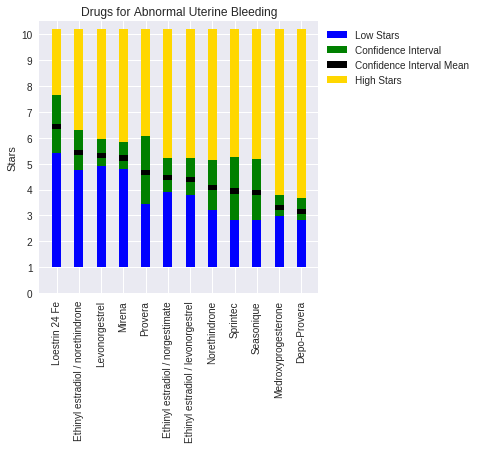

for condition Weight Loss drug Adipex-P 95% confidence interval our mean 9.06 lies in the interval 8.84 - 9.27
for condition Weight Loss drug Phentermine 95% confidence interval our mean 8.80 lies in the interval 8.69 - 8.91
for condition Weight Loss drug Saxenda 95% confidence interval our mean 8.29 lies in the interval 7.84 - 8.75
for condition Weight Loss drug Victoza 95% confidence interval our mean 8.14 lies in the interval 7.59 - 8.69
for condition Weight Loss drug Lorcaserin 95% confidence interval our mean 7.92 lies in the interval 7.62 - 8.22
for condition Weight Loss drug Liraglutide 95% confidence interval our mean 7.90 lies in the interval 7.50 - 8.31
for condition Weight Loss drug Belviq 95% confidence interval our mean 7.86 lies in the interval 7.54 - 8.17
for condition Weight Loss drug Phentermine / topiramate 95% confidence interval our mean 7.85 lies in the interval 7.50 - 8.19
for condition Weight Loss drug Qsymia 95% confidence interval our mean 7.70 lies in the inte

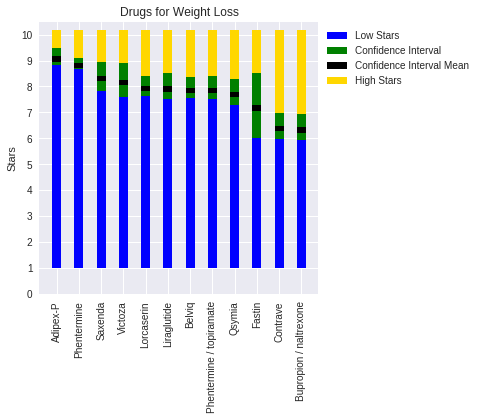

for condition Constipation, Chronic drug Linaclotide 95% confidence interval our mean 7.35 lies in the interval 6.89 - 7.80
for condition Constipation, Chronic drug Linzess 95% confidence interval our mean 7.30 lies in the interval 6.85 - 7.76
for condition Constipation, Chronic drug Lubiprostone 95% confidence interval our mean 6.89 lies in the interval 6.18 - 7.60
for condition Constipation, Chronic drug Amitiza 95% confidence interval our mean 6.68 lies in the interval 5.95 - 7.42


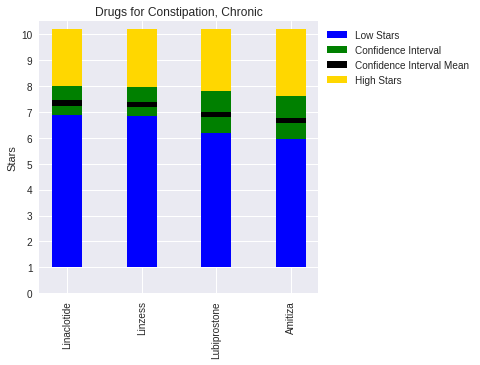

for condition Period Pain drug Naproxen 95% confidence interval our mean 8.11 lies in the interval 7.27 - 8.96


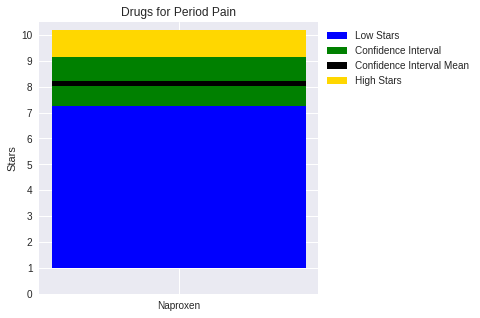

for condition Helicobacter Pylori Infection drug Prevpac 95% confidence interval our mean 8.09 lies in the interval 7.40 - 8.78
for condition Helicobacter Pylori Infection drug Amoxicillin / clarithromycin / lansoprazole 95% confidence interval our mean 7.35 lies in the interval 6.59 - 8.12
for condition Helicobacter Pylori Infection drug Pylera 95% confidence interval our mean 5.98 lies in the interval 5.24 - 6.73
for condition Helicobacter Pylori Infection drug Bismuth subcitrate potassium / metronidazole / tetracycline 95% confidence interval our mean 5.81 lies in the interval 5.10 - 6.51


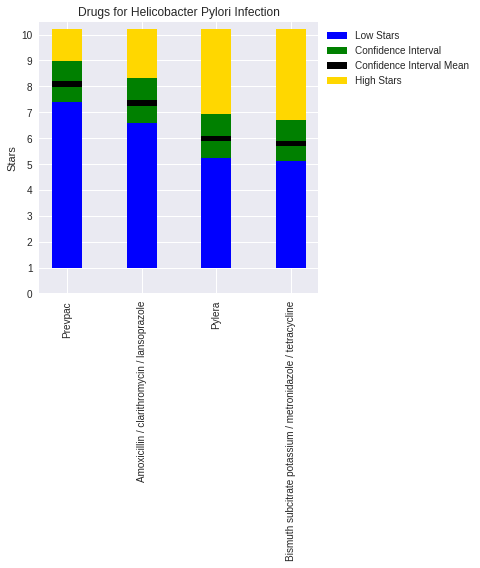

for condition Atrial Fibrillation drug Flecainide 95% confidence interval our mean 7.48 lies in the interval 6.57 - 8.39
for condition Atrial Fibrillation drug Metoprolol 95% confidence interval our mean 6.08 lies in the interval 4.99 - 7.17


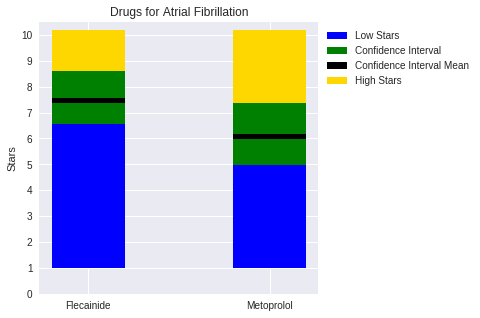

for condition Kidney Infections drug Ciprofloxacin 95% confidence interval our mean 4.79 lies in the interval 3.64 - 5.95


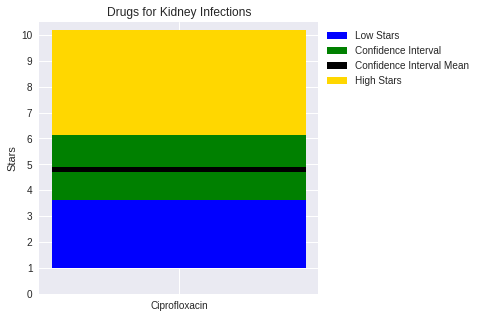

for condition Generalized Anxiety Disorde drug Lexapro 95% confidence interval our mean 8.32 lies in the interval 7.99 - 8.65
for condition Generalized Anxiety Disorde drug Pregabalin 95% confidence interval our mean 8.28 lies in the interval 7.83 - 8.72
for condition Generalized Anxiety Disorde drug Escitalopram 95% confidence interval our mean 8.16 lies in the interval 7.87 - 8.46
for condition Generalized Anxiety Disorde drug Citalopram 95% confidence interval our mean 8.05 lies in the interval 7.49 - 8.62
for condition Generalized Anxiety Disorde drug Paroxetine 95% confidence interval our mean 7.98 lies in the interval 7.27 - 8.69
for condition Generalized Anxiety Disorde drug Quetiapine 95% confidence interval our mean 7.85 lies in the interval 7.27 - 8.43
for condition Generalized Anxiety Disorde drug Sertraline 95% confidence interval our mean 7.72 lies in the interval 7.02 - 8.43
for condition Generalized Anxiety Disorde drug Venlafaxine 95% confidence interval our mean 6.81 l

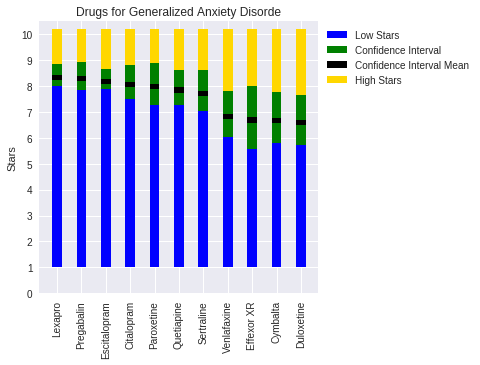

for condition Asthma drug Prednisone 95% confidence interval our mean 7.27 lies in the interval 6.10 - 8.43
for condition Asthma drug Singulair 95% confidence interval our mean 7.03 lies in the interval 5.83 - 8.24
for condition Asthma drug Montelukast 95% confidence interval our mean 5.34 lies in the interval 4.45 - 6.23


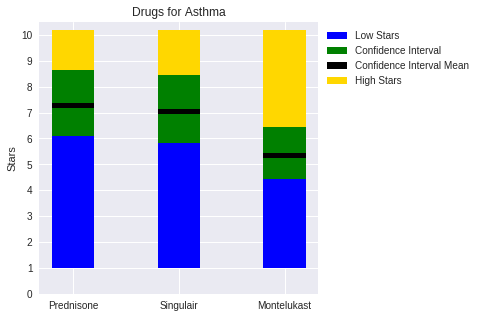

for condition Postmenopausal Symptoms drug Estradiol 95% confidence interval our mean 7.47 lies in the interval 6.79 - 8.15


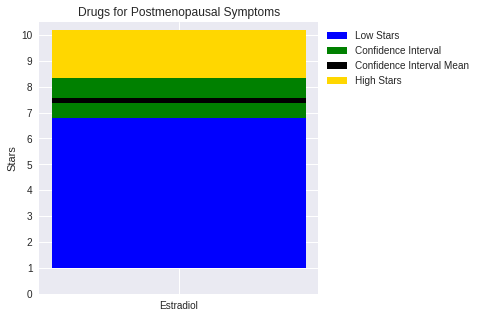

for condition High Cholesterol drug Rosuvastatin 95% confidence interval our mean 6.48 lies in the interval 5.48 - 7.48
for condition High Cholesterol drug Crestor 95% confidence interval our mean 6.48 lies in the interval 5.43 - 7.52
for condition High Cholesterol drug Livalo 95% confidence interval our mean 5.63 lies in the interval 4.39 - 6.87
for condition High Cholesterol drug Lipitor 95% confidence interval our mean 5.17 lies in the interval 3.89 - 6.45
for condition High Cholesterol drug Atorvastatin 95% confidence interval our mean 5.01 lies in the interval 4.19 - 5.84
for condition High Cholesterol drug Simvastatin 95% confidence interval our mean 4.72 lies in the interval 3.80 - 5.63


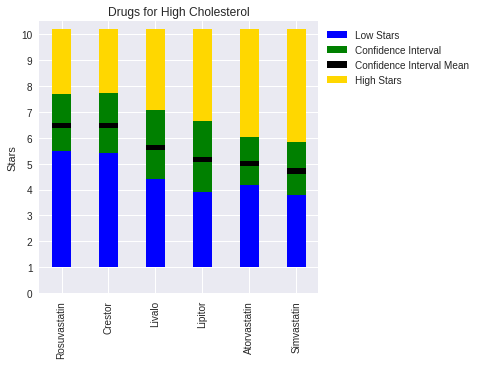

for condition Hypogonadism, Male drug Axiron 95% confidence interval our mean 7.51 lies in the interval 6.78 - 8.25
for condition Hypogonadism, Male drug Testosterone 95% confidence interval our mean 7.45 lies in the interval 7.11 - 7.79
for condition Hypogonadism, Male drug AndroGel 95% confidence interval our mean 7.40 lies in the interval 6.60 - 8.20
for condition Hypogonadism, Male drug Testim 95% confidence interval our mean 6.46 lies in the interval 5.70 - 7.22


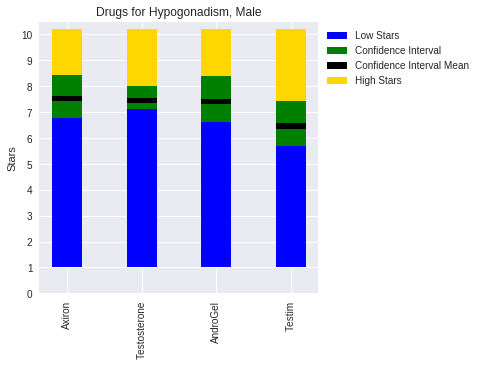

for condition Back Pain drug Norco 95% confidence interval our mean 8.69 lies in the interval 8.08 - 9.30
for condition Back Pain drug Acetaminophen / hydrocodone 95% confidence interval our mean 8.15 lies in the interval 7.73 - 8.57
for condition Back Pain drug Diclofenac 95% confidence interval our mean 7.36 lies in the interval 6.41 - 8.30
for condition Back Pain drug Tramadol 95% confidence interval our mean 6.70 lies in the interval 6.06 - 7.35
for condition Back Pain drug Naproxen 95% confidence interval our mean 5.80 lies in the interval 4.76 - 6.84


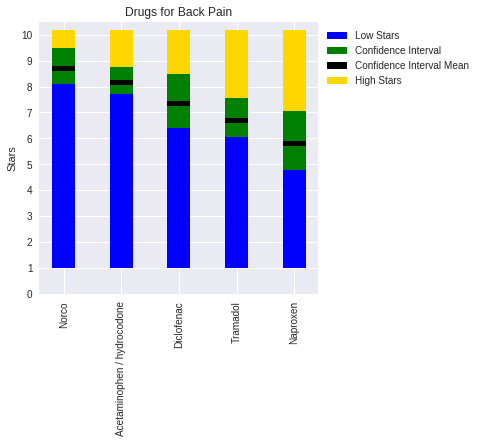

for condition Asthma, acute drug Albuterol 95% confidence interval our mean 3.81 lies in the interval 2.71 - 4.92


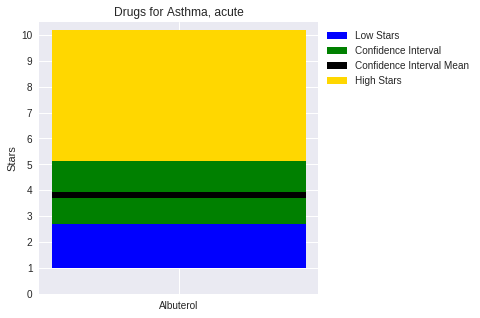

for condition Hot Flashes drug Gabapentin 95% confidence interval our mean 8.89 lies in the interval 8.34 - 9.44
for condition Hot Flashes drug Venlafaxine 95% confidence interval our mean 7.50 lies in the interval 6.60 - 8.40
for condition Hot Flashes drug Paroxetine 95% confidence interval our mean 7.45 lies in the interval 6.65 - 8.24


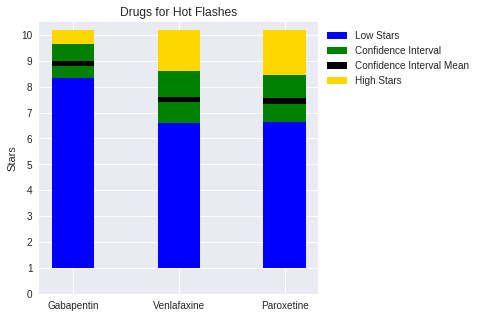

for condition Herpes Simplex, Suppression drug Valtrex 95% confidence interval our mean 8.58 lies in the interval 7.82 - 9.33
for condition Herpes Simplex, Suppression drug Valacyclovir 95% confidence interval our mean 8.54 lies in the interval 7.84 - 9.23


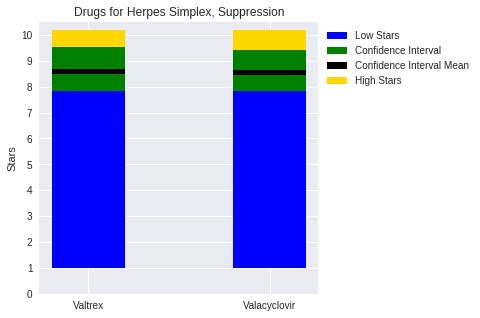

for condition Bacterial Infection drug Flagyl 95% confidence interval our mean 6.75 lies in the interval 6.04 - 7.47
for condition Bacterial Infection drug Metronidazole 95% confidence interval our mean 6.45 lies in the interval 6.04 - 6.85
for condition Bacterial Infection drug Cephalexin 95% confidence interval our mean 6.37 lies in the interval 5.41 - 7.33
for condition Bacterial Infection drug Doxycycline 95% confidence interval our mean 5.74 lies in the interval 4.68 - 6.80
for condition Bacterial Infection drug Clindamycin 95% confidence interval our mean 5.66 lies in the interval 5.20 - 6.12
for condition Bacterial Infection drug Amoxicillin / clavulanate 95% confidence interval our mean 4.33 lies in the interval 3.39 - 5.28
for condition Bacterial Infection drug Sulfamethoxazole / trimethoprim 95% confidence interval our mean 3.97 lies in the interval 2.88 - 5.06


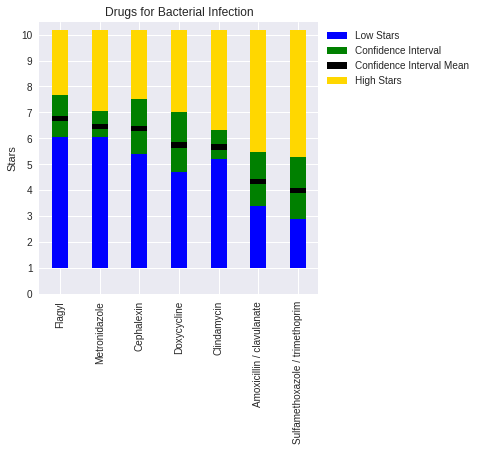

for condition Hashimoto's disease drug Armour Thyroid 95% confidence interval our mean 7.94 lies in the interval 6.80 - 9.07
for condition Hashimoto's disease drug Thyroid desiccated 95% confidence interval our mean 7.67 lies in the interval 6.67 - 8.67
for condition Hashimoto's disease drug Levothyroxine 95% confidence interval our mean 6.87 lies in the interval 5.74 - 7.99


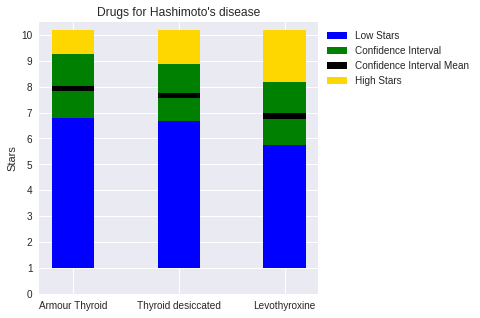

for condition Dental Abscess drug Metronidazole 95% confidence interval our mean 6.78 lies in the interval 6.00 - 7.55


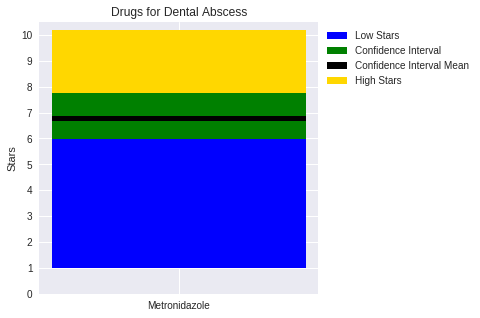

for condition Headache drug Acetaminophen / butalbital / caffeine 95% confidence interval our mean 8.89 lies in the interval 8.48 - 9.30
for condition Headache drug Acetaminophen / dichloralphenazone / isometheptene mucate 95% confidence interval our mean 8.80 lies in the interval 8.26 - 9.35
for condition Headache drug Fioricet 95% confidence interval our mean 8.70 lies in the interval 8.16 - 9.24


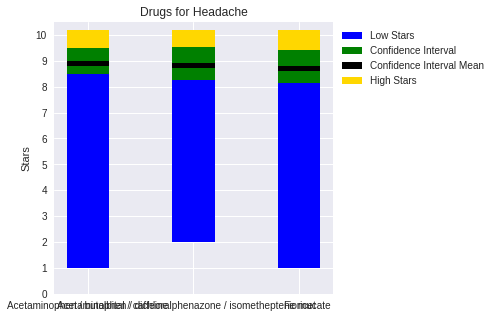

for condition Breast Cance drug Letrozole 95% confidence interval our mean 5.74 lies in the interval 4.81 - 6.67
for condition Breast Cance drug Anastrozole 95% confidence interval our mean 5.38 lies in the interval 4.75 - 6.00
for condition Breast Cance drug Exemestane 95% confidence interval our mean 4.94 lies in the interval 3.86 - 6.01


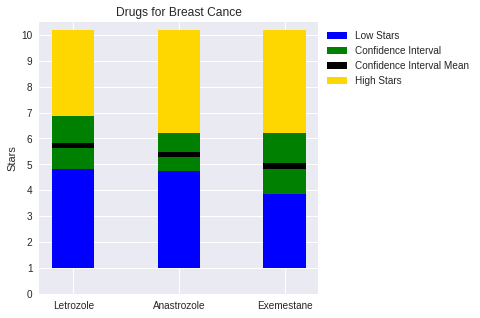

for condition Diverticulitis drug Metronidazole 95% confidence interval our mean 6.88 lies in the interval 6.31 - 7.45
for condition Diverticulitis drug Flagyl 95% confidence interval our mean 6.58 lies in the interval 5.66 - 7.50


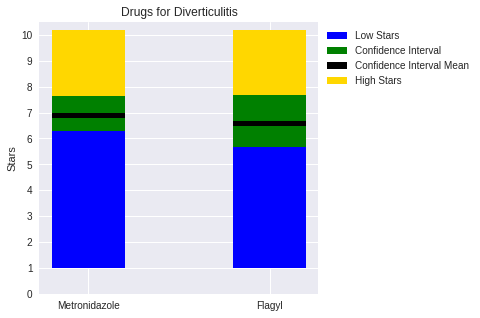

for condition Sinusitis drug Azithromycin 95% confidence interval our mean 7.17 lies in the interval 6.48 - 7.87
for condition Sinusitis drug Moxifloxacin 95% confidence interval our mean 6.59 lies in the interval 5.55 - 7.62
for condition Sinusitis drug Avelox 95% confidence interval our mean 6.05 lies in the interval 4.96 - 7.15
for condition Sinusitis drug Augmentin 95% confidence interval our mean 5.70 lies in the interval 4.70 - 6.70
for condition Sinusitis drug Levaquin 95% confidence interval our mean 5.59 lies in the interval 4.75 - 6.43
for condition Sinusitis drug Clarithromycin 95% confidence interval our mean 5.45 lies in the interval 4.74 - 6.16
for condition Sinusitis drug Levofloxacin 95% confidence interval our mean 5.38 lies in the interval 4.66 - 6.10
for condition Sinusitis drug Amoxicillin / clavulanate 95% confidence interval our mean 5.24 lies in the interval 4.56 - 5.92
for condition Sinusitis drug Cefdinir 95% confidence interval our mean 3.95 lies in the interv

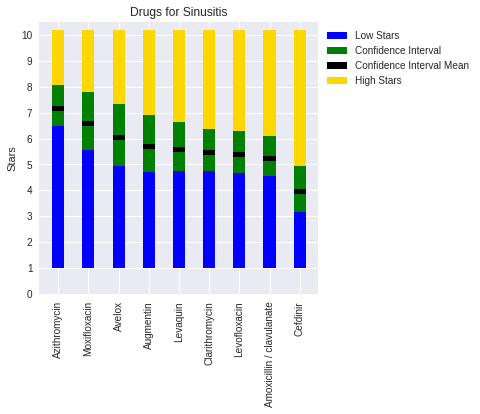

for condition Polycystic Ovary Syndrome drug Metformin 95% confidence interval our mean 7.82 lies in the interval 7.46 - 8.17
for condition Polycystic Ovary Syndrome drug Ethinyl estradiol / norethindrone 95% confidence interval our mean 6.32 lies in the interval 5.40 - 7.24


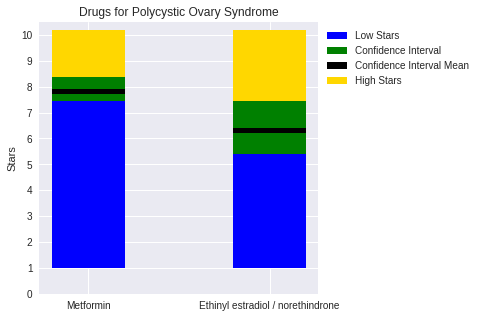

for condition Influenza drug Tamiflu 95% confidence interval our mean 7.09 lies in the interval 6.56 - 7.61
for condition Influenza drug Oseltamivir 95% confidence interval our mean 6.96 lies in the interval 6.43 - 7.49


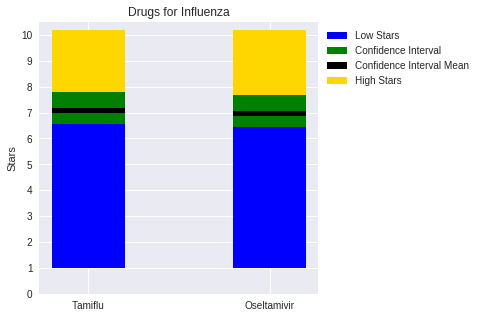

for condition Hypothyroidism, After Thyroid Removal drug Synthroid 95% confidence interval our mean 7.50 lies in the interval 6.51 - 8.49
for condition Hypothyroidism, After Thyroid Removal drug Levothyroxine 95% confidence interval our mean 7.10 lies in the interval 6.31 - 7.89


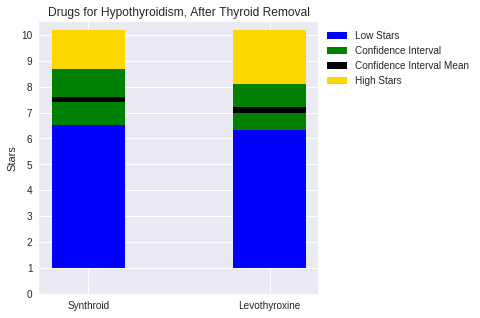

for condition Onychomycosis, Toenail drug Lamisil 95% confidence interval our mean 7.44 lies in the interval 6.54 - 8.34
for condition Onychomycosis, Toenail drug Terbinafine 95% confidence interval our mean 7.01 lies in the interval 6.43 - 7.60
for condition Onychomycosis, Toenail drug Jublia 95% confidence interval our mean 5.73 lies in the interval 4.81 - 6.66
for condition Onychomycosis, Toenail drug Efinaconazole 95% confidence interval our mean 5.61 lies in the interval 4.72 - 6.51


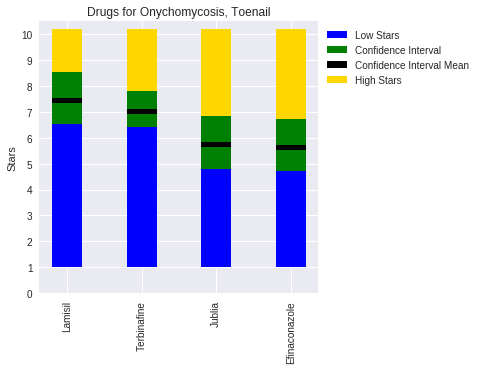

for condition GERD drug Prevacid 95% confidence interval our mean 8.47 lies in the interval 7.57 - 9.36
for condition GERD drug Lansoprazole 95% confidence interval our mean 7.95 lies in the interval 7.10 - 8.80
for condition GERD drug Ranitidine 95% confidence interval our mean 7.95 lies in the interval 6.99 - 8.91
for condition GERD drug Omeprazole 95% confidence interval our mean 7.93 lies in the interval 7.23 - 8.64
for condition GERD drug Esomeprazole 95% confidence interval our mean 7.71 lies in the interval 6.94 - 8.48
for condition GERD drug Nexium 95% confidence interval our mean 7.69 lies in the interval 6.80 - 8.57
for condition GERD drug Dexlansoprazole 95% confidence interval our mean 6.92 lies in the interval 6.15 - 7.68
for condition GERD drug Dexilant 95% confidence interval our mean 6.48 lies in the interval 5.54 - 7.41
for condition GERD drug Pantoprazole 95% confidence interval our mean 6.33 lies in the interval 5.34 - 7.33


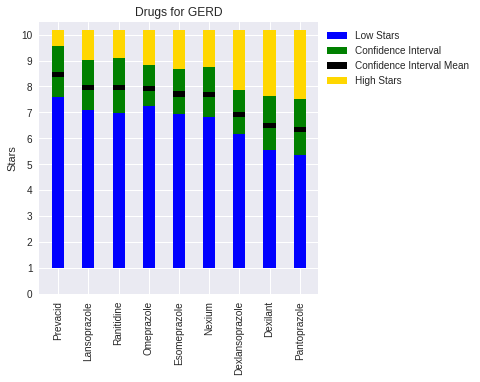

for condition Herpes Simplex drug Acyclovir 95% confidence interval our mean 8.24 lies in the interval 7.48 - 9.00
for condition Herpes Simplex drug Docosanol 95% confidence interval our mean 6.03 lies in the interval 5.42 - 6.64
for condition Herpes Simplex drug Abreva 95% confidence interval our mean 5.73 lies in the interval 5.11 - 6.35


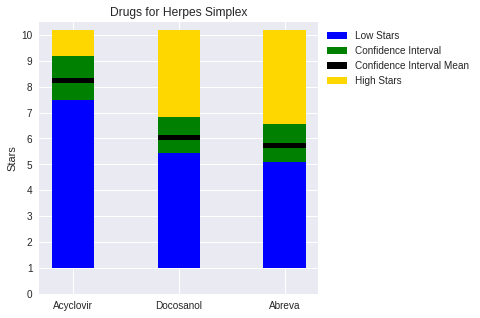

for condition Gout, Acute drug Indomethacin 95% confidence interval our mean 8.32 lies in the interval 7.71 - 8.92
for condition Gout, Acute drug Colchicine 95% confidence interval our mean 7.61 lies in the interval 6.55 - 8.66


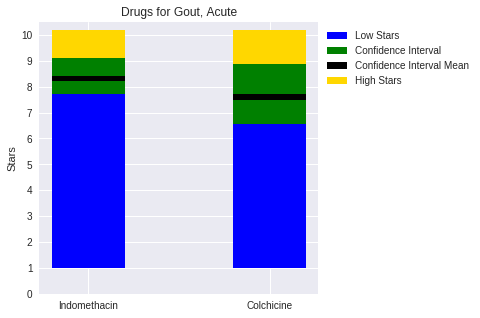

for condition Motion Sickness drug Scopolamine 95% confidence interval our mean 7.36 lies in the interval 6.55 - 8.18
for condition Motion Sickness drug Transderm-Scop 95% confidence interval our mean 6.95 lies in the interval 5.92 - 7.98


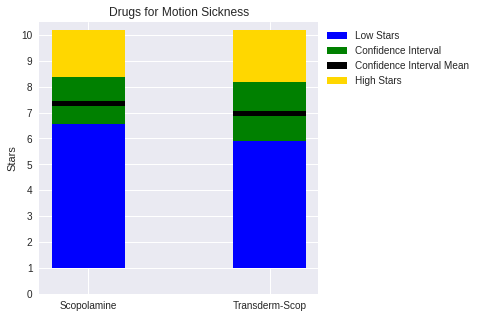

for condition Multiple Sclerosis drug Ampyra 95% confidence interval our mean 8.55 lies in the interval 7.73 - 9.36
for condition Multiple Sclerosis drug Dalfampridine 95% confidence interval our mean 8.41 lies in the interval 7.56 - 9.25
for condition Multiple Sclerosis drug Interferon beta-1a 95% confidence interval our mean 7.98 lies in the interval 7.24 - 8.72
for condition Multiple Sclerosis drug Natalizumab 95% confidence interval our mean 7.92 lies in the interval 7.19 - 8.65
for condition Multiple Sclerosis drug Tysabri 95% confidence interval our mean 7.87 lies in the interval 6.98 - 8.75
for condition Multiple Sclerosis drug Copaxone 95% confidence interval our mean 7.79 lies in the interval 7.18 - 8.39
for condition Multiple Sclerosis drug Gilenya 95% confidence interval our mean 7.76 lies in the interval 7.07 - 8.46
for condition Multiple Sclerosis drug Glatiramer 95% confidence interval our mean 7.76 lies in the interval 7.11 - 8.42
for condition Multiple Sclerosis drug Fi

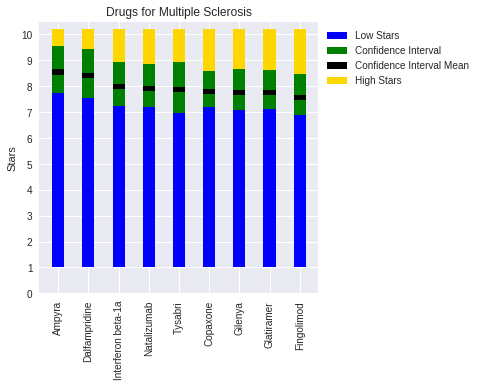

for condition Autism drug Risperidone 95% confidence interval our mean 6.33 lies in the interval 5.05 - 7.62


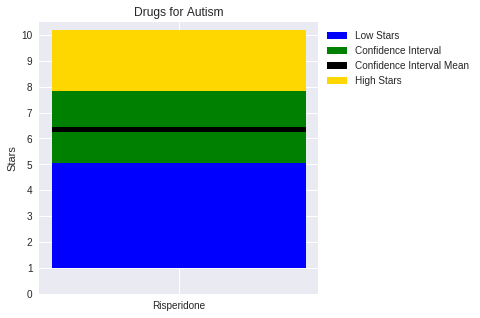

for condition Otitis Media drug Cefdinir 95% confidence interval our mean 4.33 lies in the interval 3.07 - 5.59


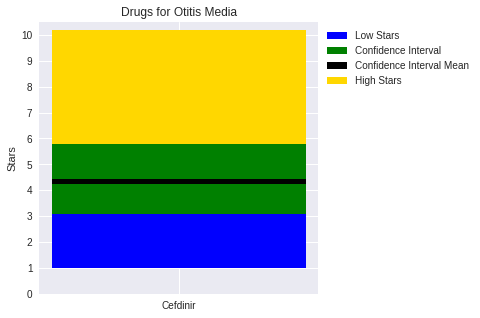

for condition Upper Respiratory Tract Infection drug Azithromycin 95% confidence interval our mean 6.88 lies in the interval 5.52 - 8.24


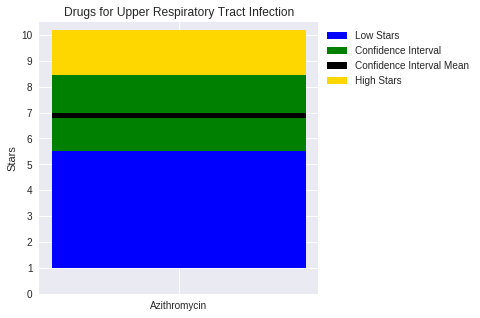

for condition Psoriatic Arthritis drug Humira 95% confidence interval our mean 7.38 lies in the interval 6.39 - 8.36
for condition Psoriatic Arthritis drug Adalimumab 95% confidence interval our mean 7.23 lies in the interval 6.27 - 8.18
for condition Psoriatic Arthritis drug Apremilast 95% confidence interval our mean 5.08 lies in the interval 4.08 - 6.08
for condition Psoriatic Arthritis drug Otezla 95% confidence interval our mean 4.95 lies in the interval 3.97 - 5.93


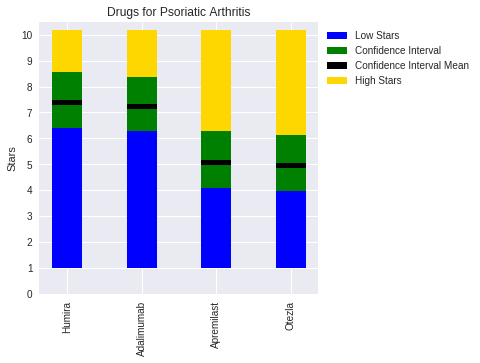

for condition Nausea/Vomiting drug Phenergan 95% confidence interval our mean 8.87 lies in the interval 8.08 - 9.67
for condition Nausea/Vomiting drug Zofran 95% confidence interval our mean 8.76 lies in the interval 8.29 - 9.23
for condition Nausea/Vomiting drug Promethazine 95% confidence interval our mean 8.48 lies in the interval 7.90 - 9.07
for condition Nausea/Vomiting drug Ondansetron 95% confidence interval our mean 7.99 lies in the interval 7.53 - 8.45
for condition Nausea/Vomiting drug Prochlorperazine 95% confidence interval our mean 4.42 lies in the interval 3.30 - 5.55
for condition Nausea/Vomiting drug Metoclopramide 95% confidence interval our mean 3.78 lies in the interval 2.60 - 4.95
for condition Nausea/Vomiting drug Compazine 95% confidence interval our mean 3.44 lies in the interval 2.30 - 4.57


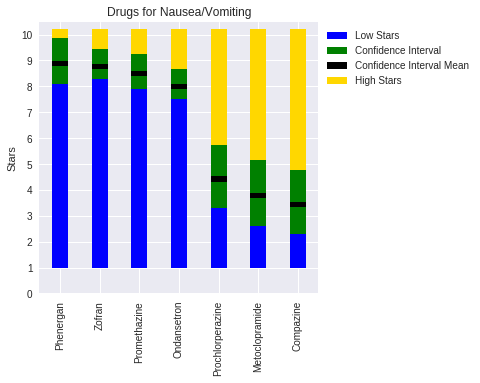

for condition mance Anxiety drug Propranolol 95% confidence interval our mean 9.67 lies in the interval 9.56 - 9.79


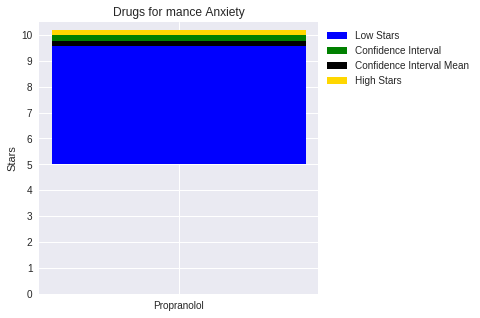

for condition Nasal Congestion drug Oxymetazoline 95% confidence interval our mean 5.16 lies in the interval 4.10 - 6.21


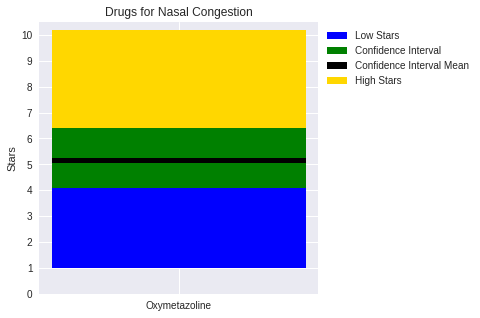

for condition Benign Essential Trem drug Primidone 95% confidence interval our mean 5.75 lies in the interval 4.63 - 6.87


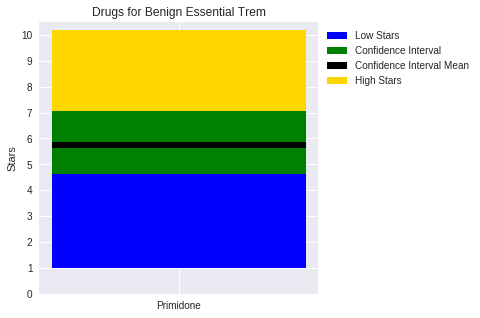

for condition Angina drug Ranolazine 95% confidence interval our mean 7.20 lies in the interval 5.98 - 8.42


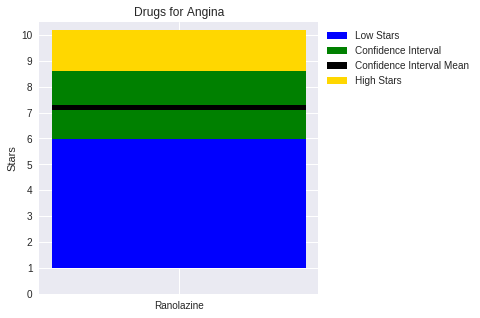

for condition Post Traumatic Stress Disorde drug Prazosin 95% confidence interval our mean 7.53 lies in the interval 6.37 - 8.68
for condition Post Traumatic Stress Disorde drug Zoloft 95% confidence interval our mean 7.46 lies in the interval 6.53 - 8.40
for condition Post Traumatic Stress Disorde drug Sertraline 95% confidence interval our mean 7.17 lies in the interval 6.28 - 8.06


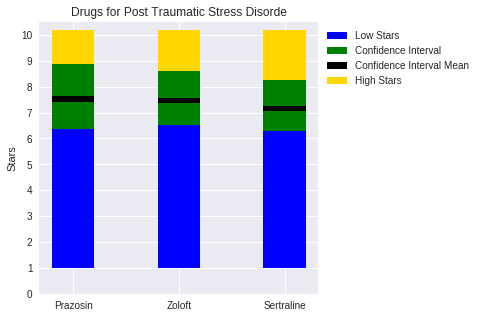

for condition Alcohol Withdrawal drug Chlordiazepoxide 95% confidence interval our mean 9.57 lies in the interval 9.36 - 9.77
for condition Alcohol Withdrawal drug Librium 95% confidence interval our mean 9.54 lies in the interval 9.34 - 9.73
for condition Alcohol Withdrawal drug Baclofen 95% confidence interval our mean 8.89 lies in the interval 8.23 - 9.56


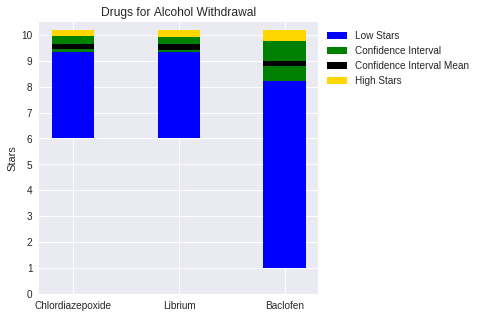

for condition Psoriasis drug Stelara 95% confidence interval our mean 8.72 lies in the interval 8.20 - 9.25
for condition Psoriasis drug Methotrexate 95% confidence interval our mean 8.60 lies in the interval 8.05 - 9.15
for condition Psoriasis drug Ustekinumab 95% confidence interval our mean 8.33 lies in the interval 7.70 - 8.96
for condition Psoriasis drug Adalimumab 95% confidence interval our mean 7.76 lies in the interval 6.94 - 8.58
for condition Psoriasis drug Humira 95% confidence interval our mean 7.60 lies in the interval 6.80 - 8.40


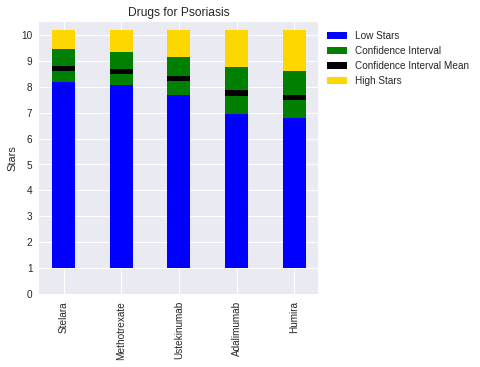

for condition Cold Sores drug Penciclovir 95% confidence interval our mean 9.25 lies in the interval 8.44 - 10.06
for condition Cold Sores drug Valacyclovir 95% confidence interval our mean 9.21 lies in the interval 8.90 - 9.52
for condition Cold Sores drug Valtrex 95% confidence interval our mean 9.20 lies in the interval 8.84 - 9.56


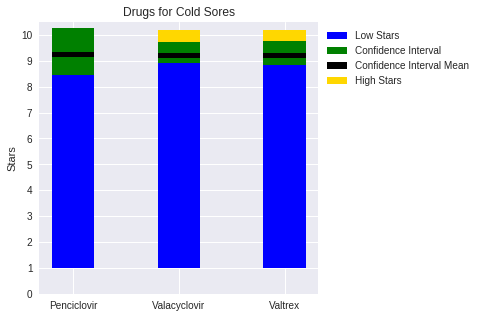

for condition Hyperhidrosis drug Drysol 95% confidence interval our mean 9.12 lies in the interval 8.82 - 9.42
for condition Hyperhidrosis drug Aluminum chloride hexahydrate 95% confidence interval our mean 8.96 lies in the interval 8.73 - 9.19
for condition Hyperhidrosis drug Hypercare 95% confidence interval our mean 8.92 lies in the interval 8.57 - 9.27
for condition Hyperhidrosis drug Oxybutynin 95% confidence interval our mean 8.27 lies in the interval 7.38 - 9.16


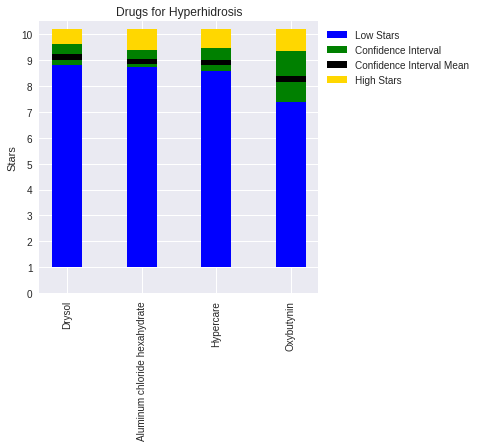

for condition Ankylosing Spondylitis drug Humira 95% confidence interval our mean 7.71 lies in the interval 6.65 - 8.78


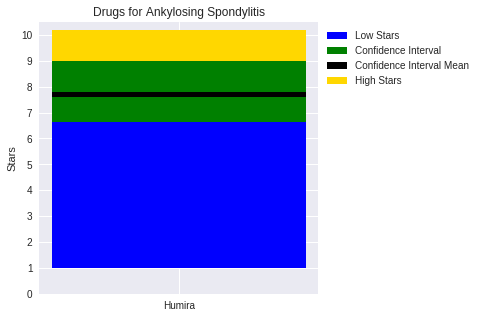

for condition Schizoaffective Disorde drug Aripiprazole 95% confidence interval our mean 7.12 lies in the interval 5.84 - 8.41
for condition Schizoaffective Disorde drug Paliperidone 95% confidence interval our mean 6.15 lies in the interval 4.98 - 7.32
for condition Schizoaffective Disorde drug Olanzapine 95% confidence interval our mean 5.38 lies in the interval 4.09 - 6.66


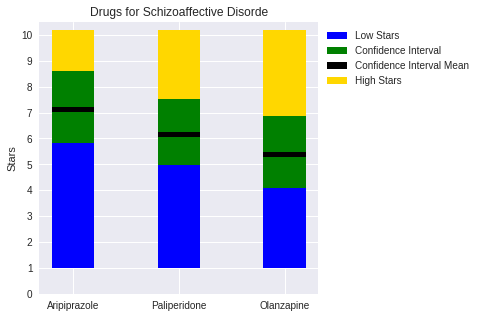

for condition Rhinitis drug Fluticasone 95% confidence interval our mean 7.60 lies in the interval 6.52 - 8.68


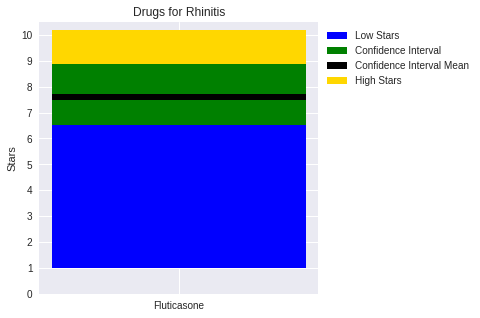

for condition Osteoporosis drug Teriparatide 95% confidence interval our mean 6.15 lies in the interval 5.03 - 7.26
for condition Osteoporosis drug Reclast 95% confidence interval our mean 6.13 lies in the interval 4.75 - 7.52
for condition Osteoporosis drug Forteo 95% confidence interval our mean 6.09 lies in the interval 5.03 - 7.14
for condition Osteoporosis drug Zoledronic acid 95% confidence interval our mean 5.44 lies in the interval 4.16 - 6.72
for condition Osteoporosis drug Prolia 95% confidence interval our mean 3.62 lies in the interval 2.63 - 4.60
for condition Osteoporosis drug Denosumab 95% confidence interval our mean 3.60 lies in the interval 2.60 - 4.60


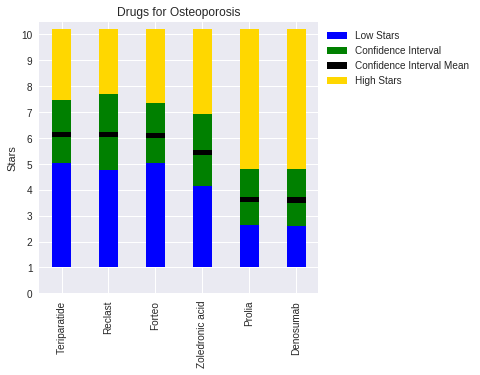

for condition Urticaria drug Omalizumab 95% confidence interval our mean 8.16 lies in the interval 7.29 - 9.03
for condition Urticaria drug Xolair 95% confidence interval our mean 7.97 lies in the interval 6.82 - 9.11
for condition Urticaria drug Cetirizine 95% confidence interval our mean 7.24 lies in the interval 6.15 - 8.32


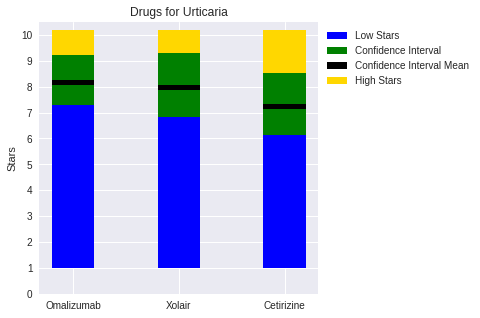

for condition Narcolepsy drug Amphetamine / dextroamphetamine 95% confidence interval our mean 8.76 lies in the interval 8.06 - 9.46
for condition Narcolepsy drug Xyrem 95% confidence interval our mean 8.32 lies in the interval 7.60 - 9.04
for condition Narcolepsy drug Sodium oxybate 95% confidence interval our mean 8.07 lies in the interval 7.27 - 8.86
for condition Narcolepsy drug Provigil 95% confidence interval our mean 6.98 lies in the interval 6.13 - 7.84
for condition Narcolepsy drug Modafinil 95% confidence interval our mean 6.81 lies in the interval 6.02 - 7.61
for condition Narcolepsy drug Armodafinil 95% confidence interval our mean 6.62 lies in the interval 5.89 - 7.35
for condition Narcolepsy drug Nuvigil 95% confidence interval our mean 6.49 lies in the interval 5.73 - 7.25


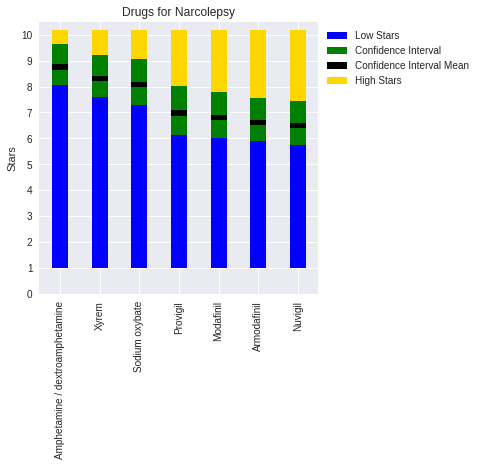

for condition Ulcerative Colitis drug Mesalamine 95% confidence interval our mean 6.97 lies in the interval 5.92 - 8.03


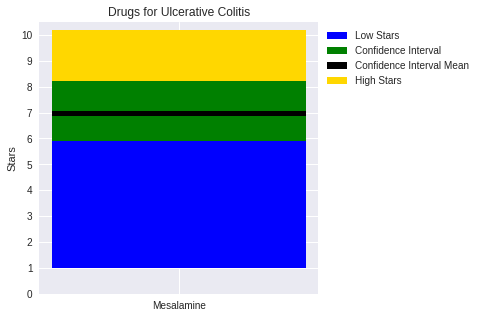

for condition Bacterial Vaginitis drug Tinidazole 95% confidence interval our mean 7.38 lies in the interval 6.43 - 8.34
for condition Bacterial Vaginitis drug Metronidazole 95% confidence interval our mean 7.05 lies in the interval 6.77 - 7.33
for condition Bacterial Vaginitis drug Clindamycin 95% confidence interval our mean 6.35 lies in the interval 5.27 - 7.43


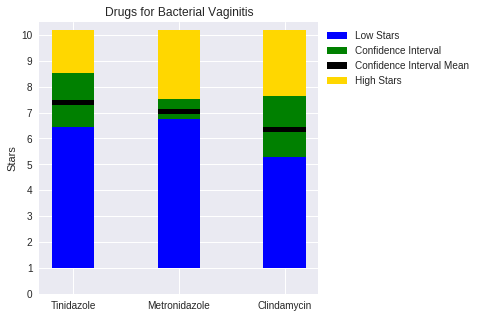

for condition COPD, Maintenance drug Spiriva 95% confidence interval our mean 6.85 lies in the interval 5.86 - 7.83
for condition COPD, Maintenance drug Tiotropium 95% confidence interval our mean 6.84 lies in the interval 5.96 - 7.72


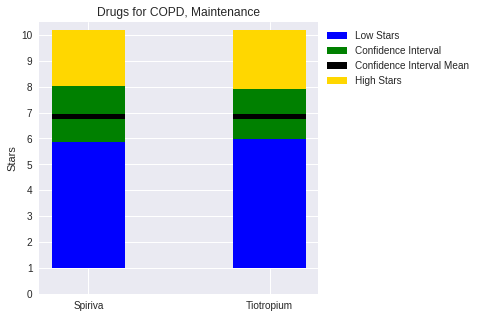

for condition Anorexia drug Cyproheptadine 95% confidence interval our mean 8.86 lies in the interval 8.24 - 9.49


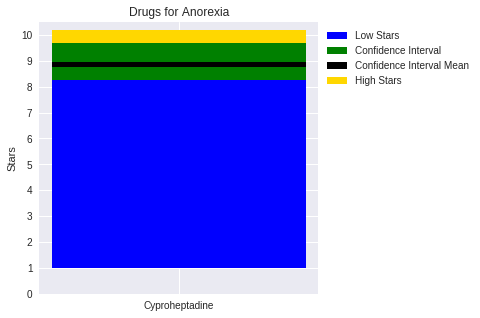

for condition Cough and Nasal Congestion drug Guaifenesin / pseudoephedrine 95% confidence interval our mean 6.68 lies in the interval 6.17 - 7.19
for condition Cough and Nasal Congestion drug Mucinex D 95% confidence interval our mean 6.39 lies in the interval 5.79 - 6.99


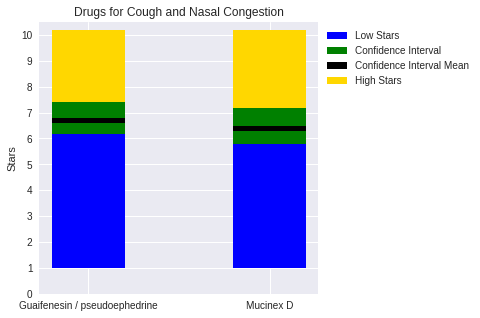

for condition Inflammatory Conditions drug Prednisone 95% confidence interval our mean 7.88 lies in the interval 7.10 - 8.67
for condition Inflammatory Conditions drug Methylprednisolone 95% confidence interval our mean 7.48 lies in the interval 6.78 - 8.17
for condition Inflammatory Conditions drug Meloxicam 95% confidence interval our mean 6.87 lies in the interval 6.15 - 7.59


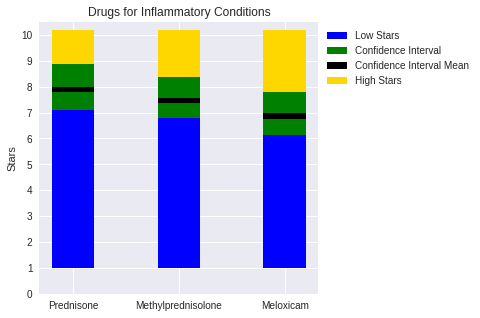

for condition Gout drug Allopurinol 95% confidence interval our mean 7.92 lies in the interval 6.85 - 8.98


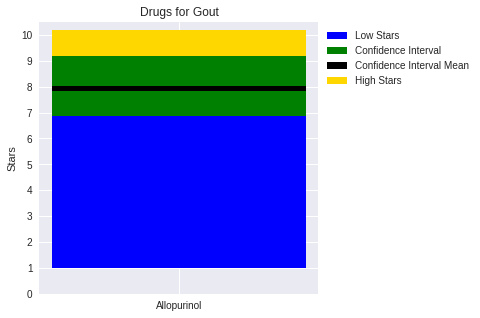

for condition Bladder Infection drug Ciprofloxacin 95% confidence interval our mean 5.00 lies in the interval 4.08 - 5.92
for condition Bladder Infection drug Macrobid 95% confidence interval our mean 4.70 lies in the interval 3.93 - 5.47
for condition Bladder Infection drug Nitrofurantoin 95% confidence interval our mean 4.56 lies in the interval 4.03 - 5.10


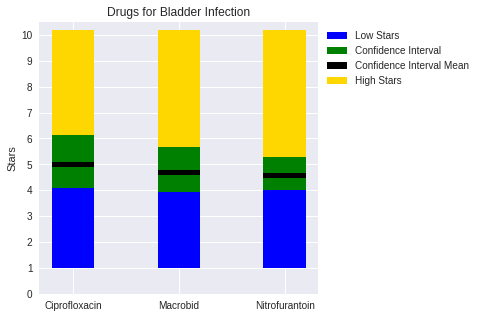

for condition Strep Throat drug Amoxicillin / clavulanate 95% confidence interval our mean 6.36 lies in the interval 5.22 - 7.50


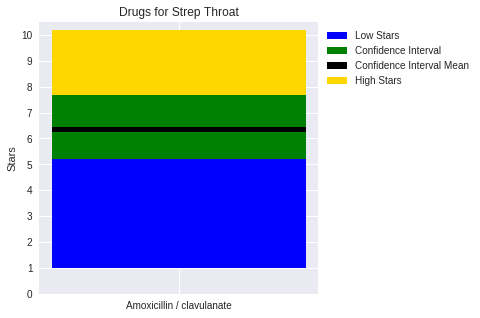

for condition Bacterial Skin Infection drug Bactrim 95% confidence interval our mean 6.58 lies in the interval 5.40 - 7.76
for condition Bacterial Skin Infection drug Sulfamethoxazole / trimethoprim 95% confidence interval our mean 5.49 lies in the interval 4.75 - 6.22


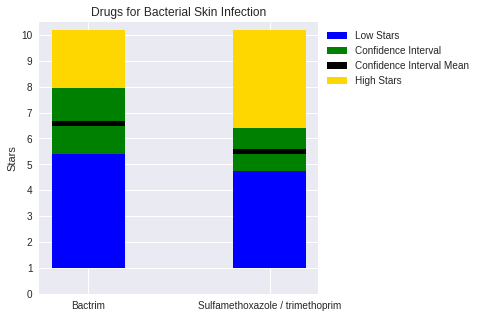

for condition Dry Skin drug Emollients 95% confidence interval our mean 6.43 lies in the interval 5.04 - 7.82


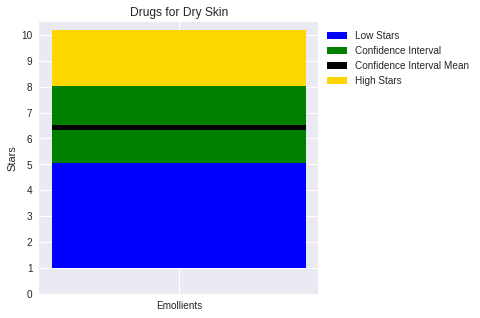

for condition Borderline Personality Disorde drug Quetiapine 95% confidence interval our mean 7.41 lies in the interval 6.75 - 8.08


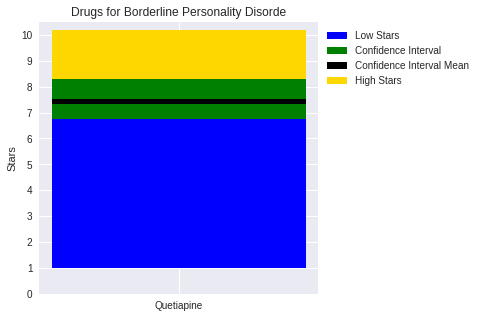

for condition Amenorrhea drug Medroxyprogesterone 95% confidence interval our mean 7.91 lies in the interval 7.12 - 8.71
for condition Amenorrhea drug Provera 95% confidence interval our mean 7.79 lies in the interval 6.81 - 8.77


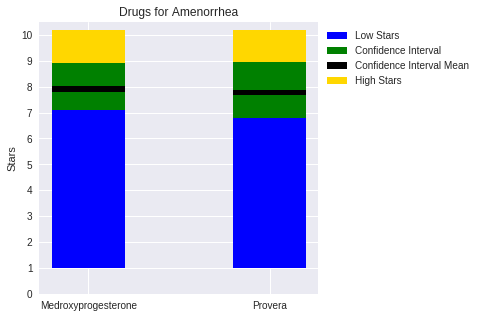

for condition Pneumonia drug Moxifloxacin 95% confidence interval our mean 8.33 lies in the interval 7.60 - 9.07
for condition Pneumonia drug Levofloxacin 95% confidence interval our mean 5.10 lies in the interval 4.21 - 6.00
for condition Pneumonia drug Levaquin 95% confidence interval our mean 4.60 lies in the interval 3.32 - 5.88


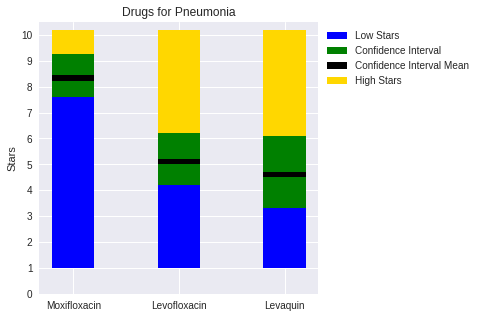

for condition Interstitial Cystitis drug Amitriptyline 95% confidence interval our mean 8.60 lies in the interval 7.84 - 9.36
for condition Interstitial Cystitis drug Pentosan polysulfate sodium 95% confidence interval our mean 8.02 lies in the interval 7.08 - 8.96
for condition Interstitial Cystitis drug Elmiron 95% confidence interval our mean 7.55 lies in the interval 6.62 - 8.49


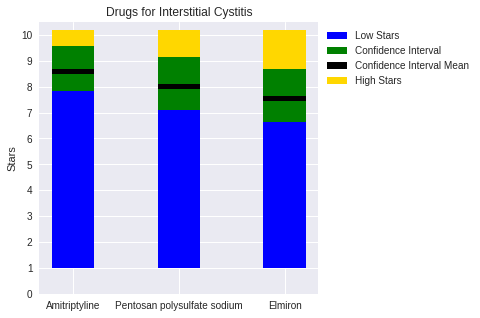

for condition Plaque Psoriasis drug Apremilast 95% confidence interval our mean 5.89 lies in the interval 5.19 - 6.60
for condition Plaque Psoriasis drug Otezla 95% confidence interval our mean 5.85 lies in the interval 5.18 - 6.52


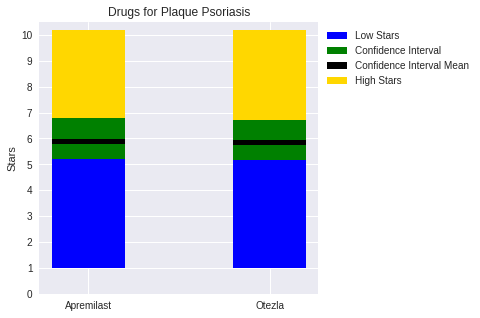

for condition Prostate Cance drug Leuprolide 95% confidence interval our mean 6.36 lies in the interval 5.35 - 7.38


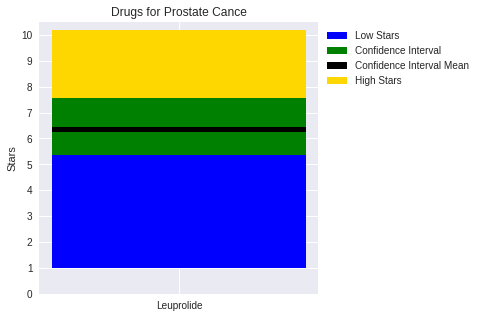

for condition Allergies drug Levocetirizine 95% confidence interval our mean 5.43 lies in the interval 4.54 - 6.31
for condition Allergies drug Xyzal 95% confidence interval our mean 4.57 lies in the interval 3.61 - 5.53


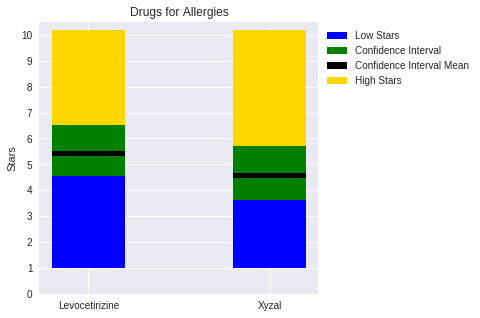

for condition moterol) drug Budesonide / formoterol 95% confidence interval our mean 7.38 lies in the interval 6.66 - 8.09


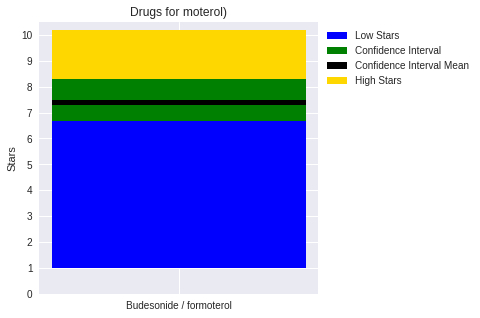

for condition Diarrhea drug Atropine / diphenoxylate 95% confidence interval our mean 8.20 lies in the interval 7.10 - 9.30


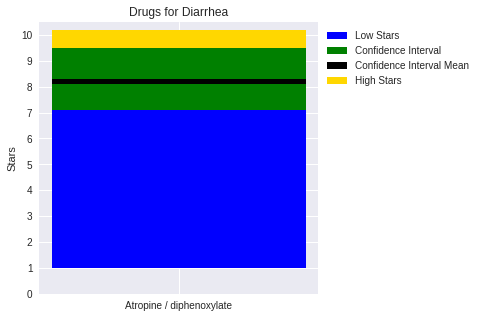

for condition Seasonal Allergic Conjunctivitis drug Olopatadine 95% confidence interval our mean 7.67 lies in the interval 6.63 - 8.70


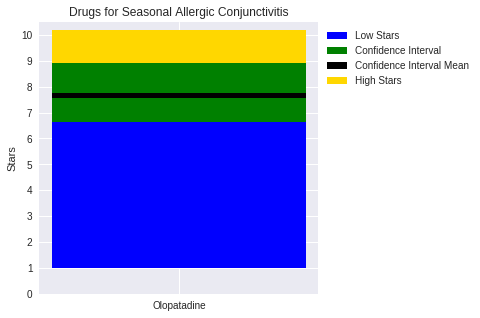

for condition Nausea/Vomiting of Pregnancy drug Diclegis 95% confidence interval our mean 6.89 lies in the interval 6.05 - 7.73
for condition Nausea/Vomiting of Pregnancy drug Doxylamine / pyridoxine 95% confidence interval our mean 6.71 lies in the interval 5.75 - 7.66


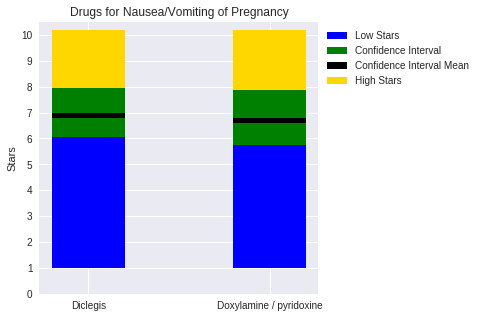

for condition Ulcerative Colitis, Active drug Lialda 95% confidence interval our mean 7.74 lies in the interval 6.74 - 8.73
for condition Ulcerative Colitis, Active drug Mesalamine 95% confidence interval our mean 7.23 lies in the interval 6.44 - 8.02


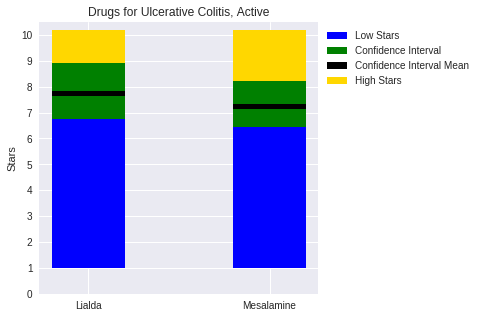

for condition Tonsillitis/Pharyngitis drug Azithromycin 95% confidence interval our mean 6.41 lies in the interval 5.35 - 7.48


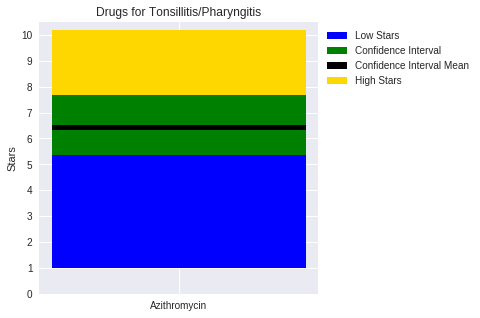

for condition Pseudotumor Cerebri drug Acetazolamide 95% confidence interval our mean 6.73 lies in the interval 5.74 - 7.71


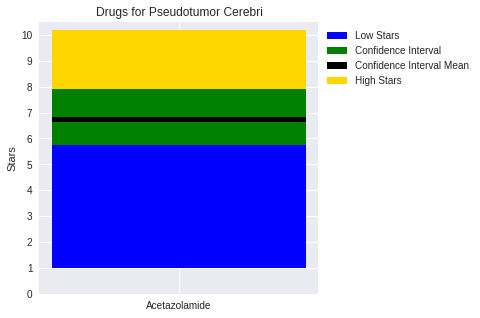

for condition Ovarian Cysts drug Ethinyl estradiol / norgestimate 95% confidence interval our mean 6.41 lies in the interval 5.61 - 7.20


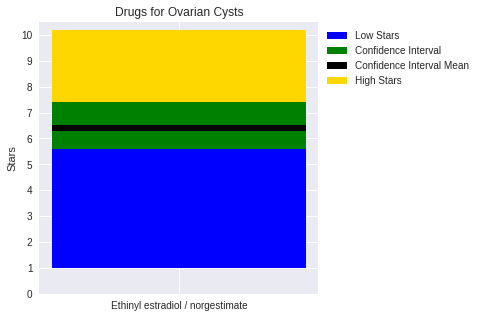

for condition Chronic Idiopathic Constipation drug Plecanatide 95% confidence interval our mean 7.61 lies in the interval 6.39 - 8.82


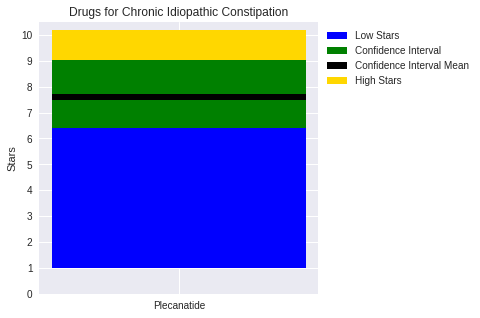

for condition Basal Cell Carcinoma drug Imiquimod 95% confidence interval our mean 7.39 lies in the interval 6.33 - 8.44


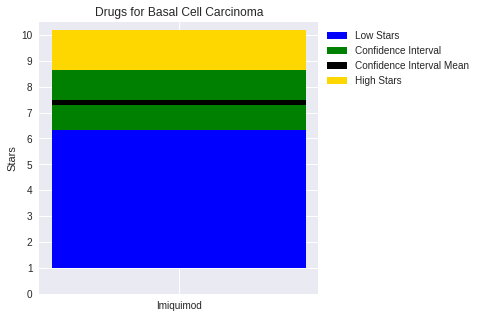

for condition Diabetic Peripheral Neuropathy drug Lyrica 95% confidence interval our mean 6.91 lies in the interval 5.82 - 8.00
for condition Diabetic Peripheral Neuropathy drug Pregabalin 95% confidence interval our mean 6.40 lies in the interval 5.32 - 7.48


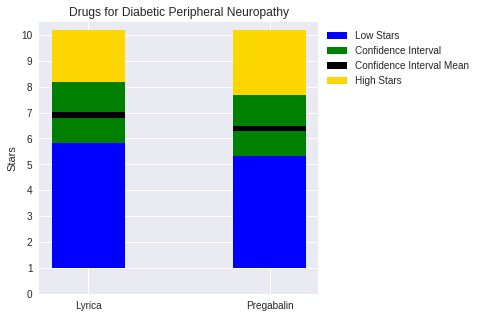

for condition Arrhythmia drug Dofetilide 95% confidence interval our mean 7.93 lies in the interval 6.97 - 8.90


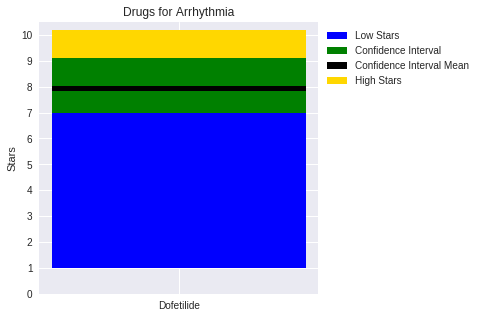

for condition Opiate Withdrawal drug Methadone 95% confidence interval our mean 8.79 lies in the interval 8.47 - 9.11
for condition Opiate Withdrawal drug Clonidine 95% confidence interval our mean 8.20 lies in the interval 7.77 - 8.64


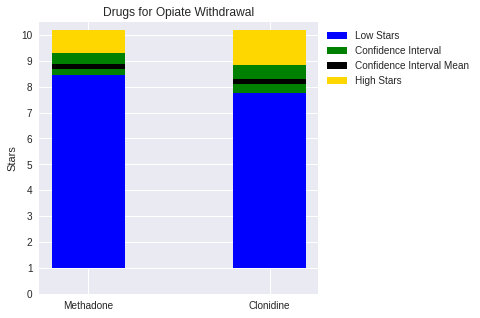

for condition Alopecia drug Minoxidil 95% confidence interval our mean 6.89 lies in the interval 5.91 - 7.87


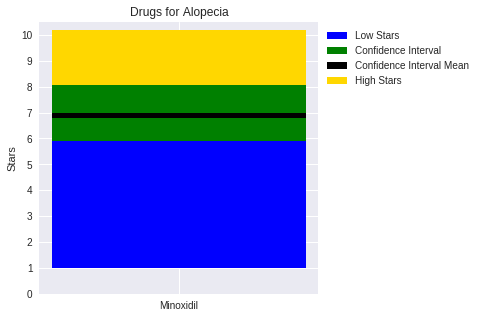

for condition Premenstrual Dysphoric Disorde drug Fluoxetine 95% confidence interval our mean 8.43 lies in the interval 7.77 - 9.10
for condition Premenstrual Dysphoric Disorde drug Drospirenone / ethinyl estradiol 95% confidence interval our mean 7.48 lies in the interval 6.70 - 8.25
for condition Premenstrual Dysphoric Disorde drug Yaz 95% confidence interval our mean 7.22 lies in the interval 6.15 - 8.30


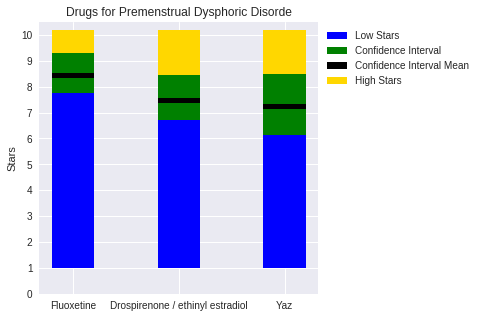

for condition Alcohol Dependence drug Campral 95% confidence interval our mean 9.25 lies in the interval 8.97 - 9.53
for condition Alcohol Dependence drug Antabuse 95% confidence interval our mean 9.15 lies in the interval 8.58 - 9.73
for condition Alcohol Dependence drug Acamprosate 95% confidence interval our mean 8.90 lies in the interval 8.52 - 9.28
for condition Alcohol Dependence drug Disulfiram 95% confidence interval our mean 8.87 lies in the interval 8.27 - 9.48
for condition Alcohol Dependence drug Naltrexone 95% confidence interval our mean 8.50 lies in the interval 7.97 - 9.03


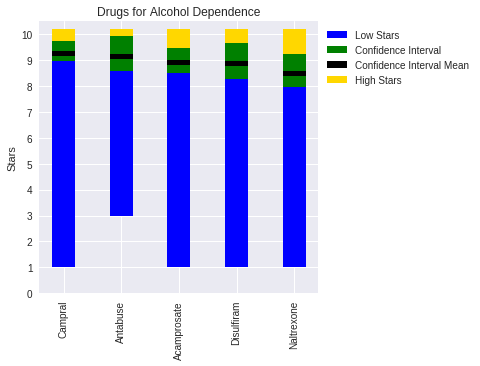

for condition Social Anxiety Disorde drug Paroxetine 95% confidence interval our mean 8.10 lies in the interval 7.45 - 8.76
for condition Social Anxiety Disorde drug Zoloft 95% confidence interval our mean 7.72 lies in the interval 7.18 - 8.25
for condition Social Anxiety Disorde drug Paxil 95% confidence interval our mean 7.61 lies in the interval 6.75 - 8.47
for condition Social Anxiety Disorde drug Sertraline 95% confidence interval our mean 7.46 lies in the interval 7.01 - 7.91


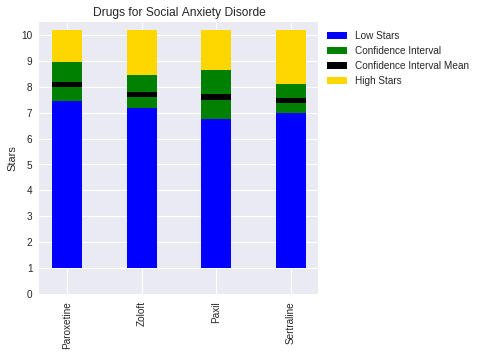

for condition Eye Redness drug Ocular lubricant 95% confidence interval our mean 7.77 lies in the interval 6.47 - 9.06


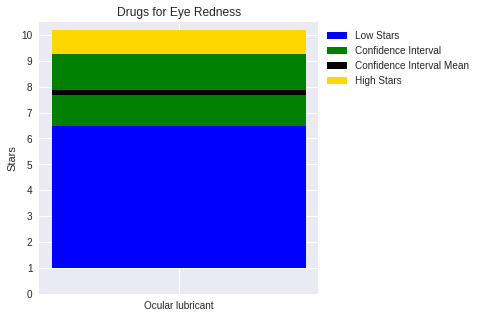

for condition Menorrhagia drug Tranexamic acid 95% confidence interval our mean 8.38 lies in the interval 7.60 - 9.17


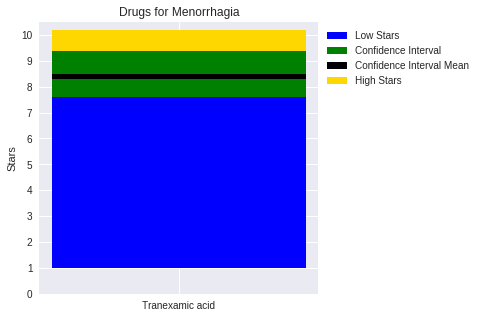

for condition Seizure Prevention drug Lamotrigine 95% confidence interval our mean 6.91 lies in the interval 5.95 - 7.87
for condition Seizure Prevention drug Topiramate 95% confidence interval our mean 6.03 lies in the interval 4.91 - 7.14


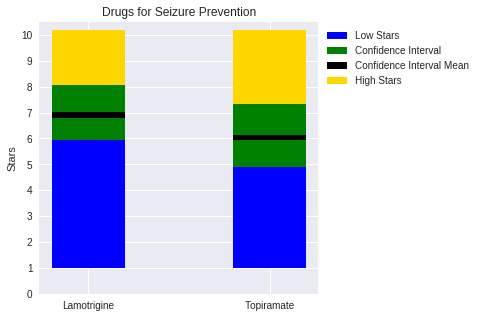

for condition Peripheral Neuropathy drug Gabapentin 95% confidence interval our mean 6.90 lies in the interval 6.24 - 7.56


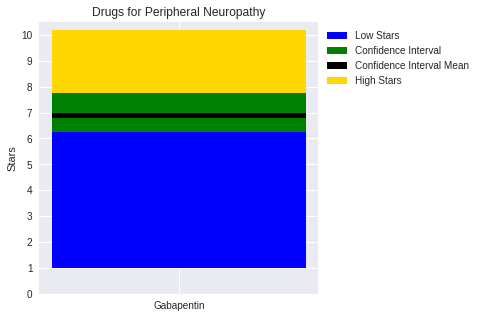

for condition Edema drug Furosemide 95% confidence interval our mean 7.61 lies in the interval 6.73 - 8.50


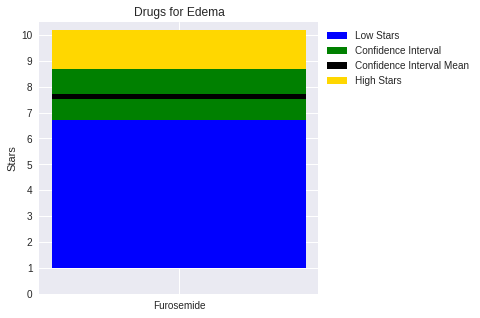

for condition Prevention of Thromboembolism in Atrial Fibrillation drug Dabigatran 95% confidence interval our mean 7.60 lies in the interval 6.90 - 8.30
for condition Prevention of Thromboembolism in Atrial Fibrillation drug Pradaxa 95% confidence interval our mean 7.25 lies in the interval 6.52 - 7.98
for condition Prevention of Thromboembolism in Atrial Fibrillation drug Apixaban 95% confidence interval our mean 6.06 lies in the interval 4.82 - 7.30


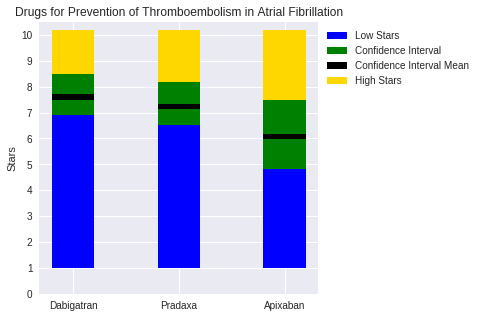

for condition Cluster Headaches drug Verapamil 95% confidence interval our mean 9.03 lies in the interval 8.37 - 9.68
for condition Cluster Headaches drug Sumatriptan 95% confidence interval our mean 8.73 lies in the interval 7.95 - 9.51


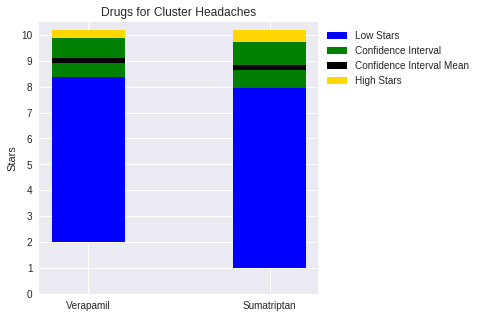

for condition Burns, External drug Silver sulfadiazine 95% confidence interval our mean 10.00 lies in the interval 10.00 - 10.00


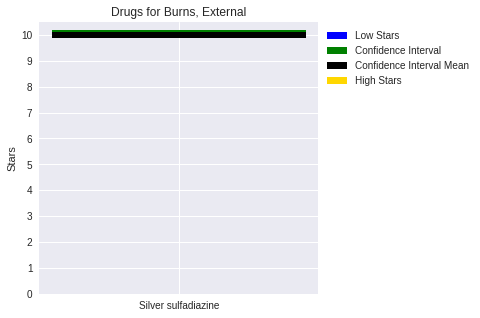

for condition Dry Eye Disease drug Lifitegrast 95% confidence interval our mean 5.72 lies in the interval 4.84 - 6.60
for condition Dry Eye Disease drug Xiidra 95% confidence interval our mean 5.62 lies in the interval 4.72 - 6.52


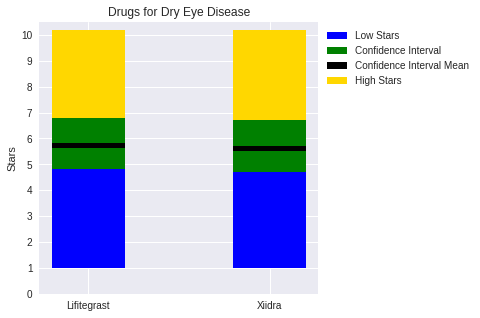

for condition Vitamin/Mineral Supplementation during Pregnancy/Lactation drug Multivitamin, prenatal 95% confidence interval our mean 8.47 lies in the interval 7.70 - 9.25


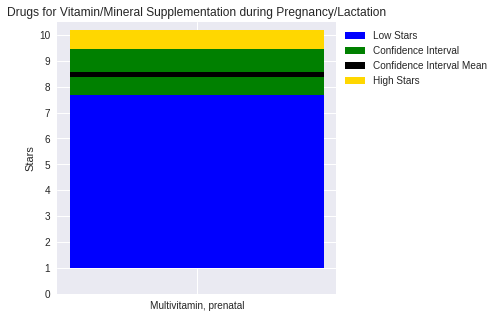

for condition Urinary Tract Stones drug Flomax 95% confidence interval our mean 8.48 lies in the interval 7.77 - 9.18
for condition Urinary Tract Stones drug Tamsulosin 95% confidence interval our mean 7.64 lies in the interval 6.76 - 8.52


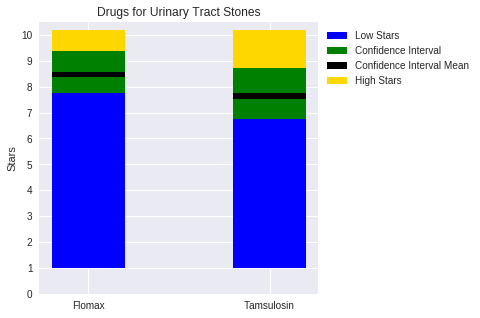

for condition Dietary Supplementation drug Multivitamin 95% confidence interval our mean 6.74 lies in the interval 5.52 - 7.95


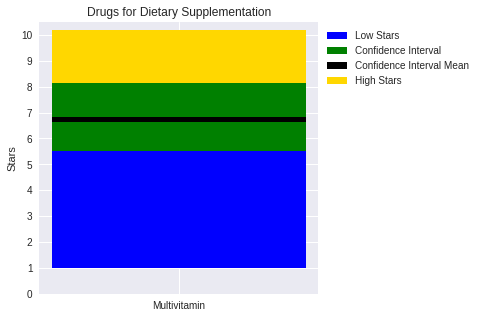

for condition Perimenopausal Symptoms drug Clonidine 95% confidence interval our mean 6.90 lies in the interval 5.80 - 8.01


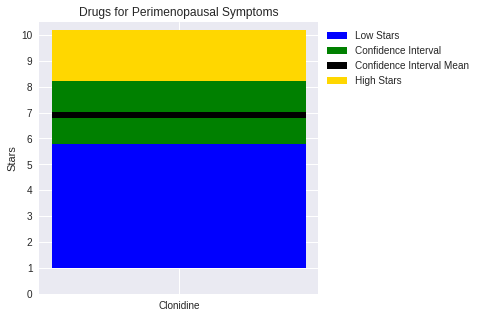

for condition Renal Cell Carcinoma drug Pazopanib 95% confidence interval our mean 8.33 lies in the interval 7.50 - 9.17


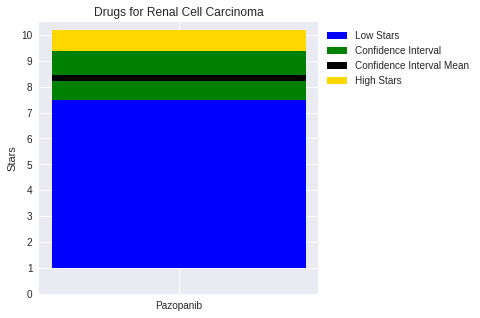

for condition Vertig drug Meclizine 95% confidence interval our mean 7.31 lies in the interval 6.67 - 7.95


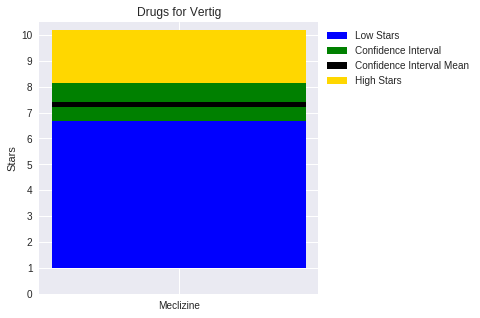

for condition Supraventricular Tachycardia drug Metoprolol 95% confidence interval our mean 7.00 lies in the interval 6.07 - 7.93


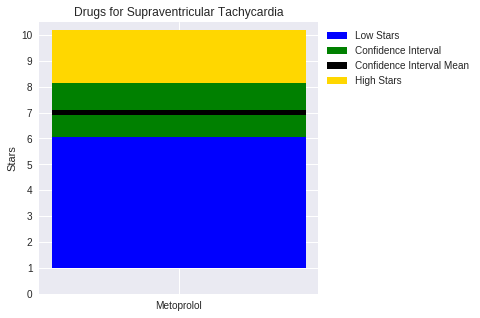

for condition Binge Eating Disorde drug Vyvanse 95% confidence interval our mean 7.76 lies in the interval 6.83 - 8.70
for condition Binge Eating Disorde drug Lisdexamfetamine 95% confidence interval our mean 7.26 lies in the interval 6.27 - 8.25


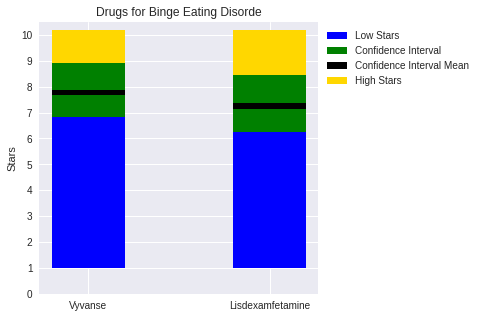

for condition Trichomoniasis drug Metronidazole 95% confidence interval our mean 7.80 lies in the interval 7.19 - 8.42


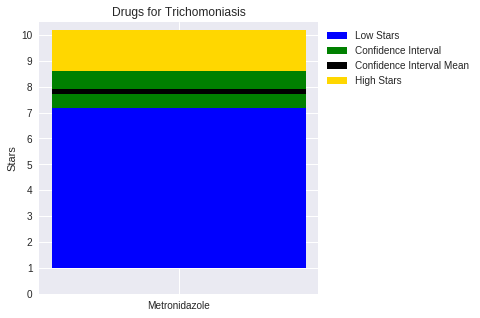

for condition Androgenetic Alopecia drug Finasteride 95% confidence interval our mean 5.68 lies in the interval 4.44 - 6.93


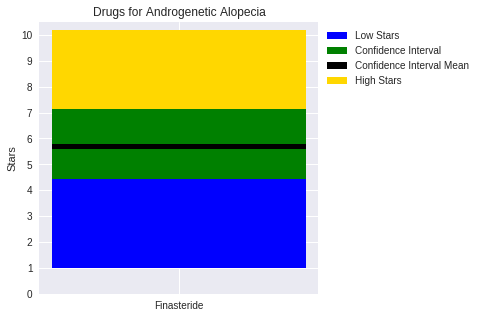

for condition min) drug Metformin 95% confidence interval our mean 6.97 lies in the interval 5.79 - 8.15


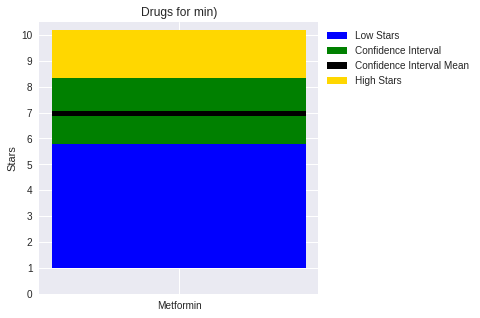

for condition Melasma drug Fluocinolone / hydroquinone / tretinoin 95% confidence interval our mean 8.89 lies in the interval 8.01 - 9.78
for condition Melasma drug Tri-Luma 95% confidence interval our mean 8.78 lies in the interval 7.84 - 9.73


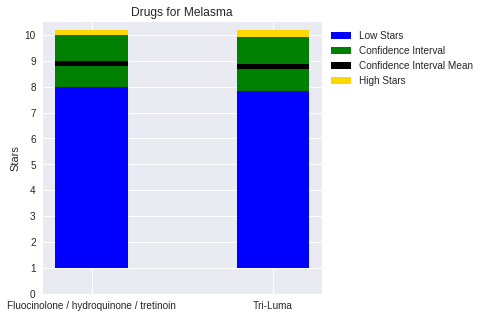

for condition ge (amlodipine / valsartan) drug Amlodipine / valsartan 95% confidence interval our mean 6.06 lies in the interval 5.03 - 7.09


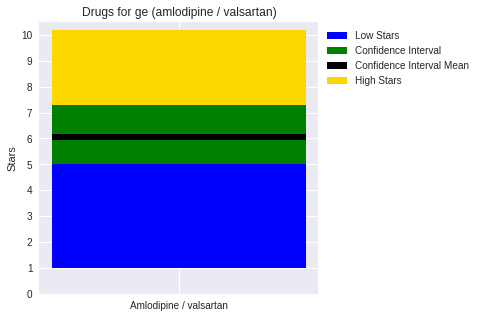

for condition Human Papilloma Virus drug Imiquimod 95% confidence interval our mean 7.16 lies in the interval 6.51 - 7.82


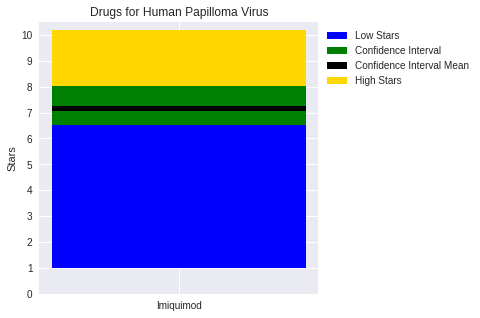

for condition Neuralgia drug Lyrica 95% confidence interval our mean 7.43 lies in the interval 6.38 - 8.49


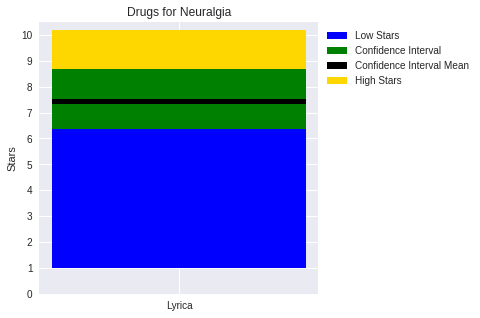

for condition Premature Lab drug Makena 95% confidence interval our mean 7.33 lies in the interval 6.06 - 8.61
for condition Premature Lab drug Hydroxyprogesterone 95% confidence interval our mean 6.39 lies in the interval 4.89 - 7.89


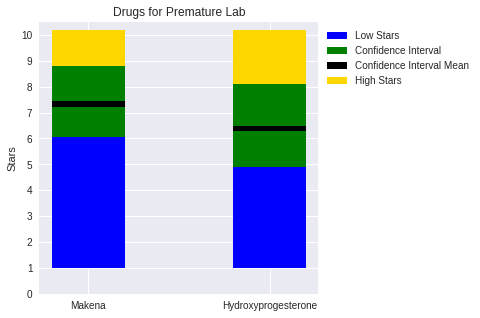

for condition Prevention of Bladder infection drug Nitrofurantoin 95% confidence interval our mean 7.11 lies in the interval 5.77 - 8.45


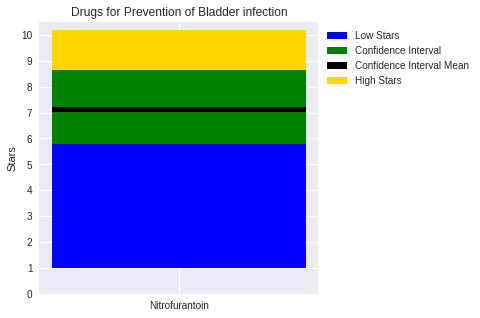

In [19]:
from operator import itemgetter, attrgetter
c_unique = df.condition.unique()
condition_length = len(c_unique)
x = 0
y = 0
for c in c_unique:
  # print(c)
  d_unique =  df[df.condition == c].drugName.unique()
  drug_length = 0
  drugs_used = []
  cis = []
  for d in d_unique:
    cdf = df[(df.condition == c) & (df.drugName == d) ]['rating'] 
    ci = None
    lcdf = len(cdf)
    if lcdf >= minLen:
      ci = confidence_interval(cdf)
      drugs_used.append(d)
      
      min_stars = cdf.min()
      below_ci = max(ci[1] - min_stars,0)
      ci_l = (ci[2] - ci[1])
      ci_half_l = ci[0] - ci[1] - half_mean_height
      ci_half_h = ci_l - ci_half_l
      mean = 2 * half_mean_height
      max_stars = max(cdf.max() - ci[2], 0)          
      cis.append({'ci': ci,  'drug': d, 'reviews_count': lcdf, 'min_stars': min_stars, 'below_ci': below_ci,   'ci_half_l': ci_half_l,  'mean': mean, 'ci_half_h': ci_half_h,  'max_stars': max_stars })     
      # cis.append({'ci': ci,  'drug': d, 'reviews_count': lcdf, 'min_stars': cdf.min(), 'max_stars': cdf.max(), 'mean_low': ci[0] - half_mean_height, 'mean_high': ci[0] + half_mean_height, 'low': ci[1], 'high': ci[2]  })
  if len(cis) > 0:
    cis = sorted(cis, key=lambda v: v['ci'][0], reverse=True) # sorting by ci mean
    for _ci in cis:
      print(f"for condition {c} drug {_ci['drug']} 95% confidence interval {report_confidence_interval(_ci['ci'])}")
    printChart(c,cis)
  y += 1
    #plt.bar(np.arange(0,len(cdf)),cdf)
    